# WORKING DOC

In [6]:
# This is a project#2 submitted by Alexander Kelso, Briar Mercer, Tas Brown, and Sreeni Kalva as part of Monash Uni Fintech Bootcamp Feb 2021 program. 
# The below program is a Algotrading implementing  3 different strategies and comparing their performance against a Crypto (LINK)
# Please review XXXX.PPT for more general overview of this project.

### Import Libraries and Dependencies

In [92]:
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [8]:
# Load environment variables

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secret data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secret data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [9]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [10]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['LINK/USDT']['symbol']
# crypto_details

'LINK/USDT'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [11]:
# Fetch daily candlestick bar data from `LINK/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620565200000, 48.15448, 48.81072, 48.15448, 48.81072, 834.73245996]

In [12]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume
0  1620558000000  49.28653  49.42528  48.72541  48.72541  1650.566542
1  1620561600000  48.41414  49.06728  47.61288  47.69708  1777.427578
2  1620565200000  48.15448  48.81072  48.15448  48.81072   834.732460
3  1620568800000  48.86427  49.91365  48.75978  49.91365  1307.732680
4  1620572400000  49.86212  51.80152  49.79133  51.80152  2582.096918

'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [13]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume  \
0  1620558000000  49.28653  49.42528  48.72541  48.72541  1650.566542   
1  1620561600000  48.41414  49.06728  47.61288  47.69708  1777.427578   
2  1620565200000  48.15448  48.81072  48.15448  48.81072   834.732460   
3  1620568800000  48.86427  49.91365  48.75978  49.91365  1307.732680   
4  1620572400000  49.86212  51.80152  49.79133  51.80152  2582.096918   

                 date  
0 2021-05-09 11:00:00  
1 2021-05-09 12:00:00  
2 2021-05-09 13:00:00  
3 2021-05-09 14:00:00  
4 2021-05-09 15:00:00

'_________________________'

'historical_prices_df shape: (720, 7)'

In [14]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 11:00:00  1620558000000  49.28653  49.42528  48.72541  48.72541   
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   
2021-05-09 13:00:00  1620565200000  48.15448  48.81072  48.15448  48.81072   
2021-05-09 14:00:00  1620568800000  48.86427  49.91365  48.75978  49.91365   
2021-05-09 15:00:00  1620572400000  49.86212  51.80152  49.79133  51.80152   
2021-05-09 16:00:00  1620576000000  51.86890  52.31117  50.75032  50.89869   
2021-05-09 17:00:00  1620579600000  50.78164  51.04909  50.38189  50.59835   
2021-05-09 18:00:00  1620583200000  50.65753  51.30955  50.42594  50.88990   
2021-05-09 19:00:00  1620586800000  50.86864  51.07784  50.00731  50.54297   
2021-05-09 20:00:00  1620590400000  50.35371  50.95966  50.35371  50.84000   
2021-05-09 21:00:00  1620594000000  50.84000  51.23853  50.14513  50.14513   
2021-05-09 22:00:00  1620597600000  50.27767  51.51099  50.27370  51.35348   
2021-05-09 23:00:00  1620601200000  51.76075  52.08741  51.17103  51.99990   
2021-05-10 00:00:00  1620604800000  52.28014  52.91000  51.47047  51.47047   
2021-05-10 01:00:00  1620608400000  51.44790  51.82364  51.32238  51.52938   
2021-05-10 02:00:00  1620612000000  51.43645  51.85651  51.43229  51.53074   
2021-05-10 03:00:00  1620615600000  51.52637  52.13023  51.46257  51.96999   
2021-05-10 04:00:00  1620619200000  51.86840  51.86840  51.34493  51.68809   
2021-05-10 05:00:00  1620622800000  52.17464  52.25859  51.49503  51.60000   
2021-05-10 06:00:00  1620626400000  51.70966  52.41087  51.70966  51.98208   
2021-05-10 07:00:00  1620630000000  52.09619  52.42767  51.72000  51.72000   
2021-05-10 08:00:00  1620633600000  51.53805  51.71618  50.80629  51.52213   
2021-05-10 09:00:00  1620637200000  51.41018  51.82003  50.58389  50.85370   
2021-05-10 10:00:00  1620640800000  50.91595  51.11064  50.13834  50.19934   
2021-05-10 11:00:00  1620644400000  50.05272  50.97968  49.30000  50.45710   
2021-05-10 12:00:00  1620648000000  50.43851  50.75521  50.15697  50.42942   
2021-05-10 13:00:00  1620651600000  50.20784  50.71584  49.69643  49.89203   
2021-05-10 14:00:00  1620655200000  49.80106  49.80106  49.15912  49.44167   
2021-05-10 15:00:00  1620658800000  49.10291  50.63303  49.10287  50.63303   
2021-05-10 16:00:00  1620662400000  50.54243  50.86507  49.78809  49.79332   
...                            ...       ...       ...       ...       ...   
2021-06-07 05:00:00  1623042000000  28.23603  28.23603  28.23603  28.23603   
2021-06-07 06:00:00  1623045600000  28.21918  28.21918  27.85706  27.90033   
2021-06-07 07:00:00  1623049200000  27.77930  27.90644  27.67972  27.84604   
2021-06-07 08:00:00  1623052800000  27.74079  27.80159  27.69808  27.71358   
2021-06-07 09:00:00  1623056400000  27.84367  27.90558  27.84367  27.90558   
2021-06-07 10:00:00  1623060000000  28.10169  28.65372  28.10169  28.58740   
2021-06-07 11:00:00  1623063600000  28.45000  28.46755  28.21120  28.21120   
2021-06-07 12:00:00  1623067200000  28.31543  28.47458  28.29371  28.47458   
2021-06-07 13:00:00  1623070800000  28.25734  28.25734  28.09572  28.09572   
2021-06-07 14:00:00  1623074400000  28.01249  28.01249  27.77930  27.77930   
2021-06-07 15:00:00  1623078000000  27.85215  27.86129  27.72525  27.72525   
2021-06-07 16:00:00  1623081600000  27.60000  27.60000  27.45163  27.56547   
2021-06-07 17:00:00  1623085200000  27.45188  27.45188  27.12796  27.13928   
2021-06-07 18:00:00  1623088800000  27.05445  27.08530  26.68813  26.78390   
2021-06-07 19:00:00  1623092400000  26.67241  26.97757  26.61248  26.97757   
2021-06-07 20:00:00  1623096000000  26.95671  26.95671  25.21045  25.77915   
2021-06-07 21:00:00  1623099600000  25.44601  25.63564  24.34795  25.08813   
2021-06-07 22:00:00  1623103200000  25.06197  25.29224  24.77099  25.05191   
2021-06-07 23:00:00  1623106800000  24.92063  2

### Plot Daily Returns

In [15]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   
2021-05-09 13:00:00  1620565200000  48.15448  48.81072  48.15448  48.81072   
2021-05-09 14:00:00  1620568800000  48.86427  49.91365  48.75978  49.91365   
2021-05-09 15:00:00  1620572400000  49.86212  51.80152  49.79133  51.80152   
2021-05-09 16:00:00  1620576000000  51.86890  52.31117  50.75032  50.89869   
2021-05-09 17:00:00  1620579600000  50.78164  51.04909  50.38189  50.59835   
2021-05-09 18:00:00  1620583200000  50.65753  51.30955  50.42594  50.88990   
2021-05-09 19:00:00  1620586800000  50.86864  51.07784  50.00731  50.54297   
2021-05-09 20:00:00  1620590400000  50.35371  50.95966  50.35371  50.84000   
2021-05-09 21:00:00  1620594000000  50.84000  51.23853  50.14513  50.14513   
2021-05-09 22:00:00  1620597600000  50.27767  51.51099  50.27370  51.35348   
2021-05-09 23:00:00  1620601200000  51.76075  52.08741  51.17103  51.99990   
2021-05-10 00:00:00  1620604800000  52.28014  52.91000  51.47047  51.47047   
2021-05-10 01:00:00  1620608400000  51.44790  51.82364  51.32238  51.52938   
2021-05-10 02:00:00  1620612000000  51.43645  51.85651  51.43229  51.53074   
2021-05-10 03:00:00  1620615600000  51.52637  52.13023  51.46257  51.96999   
2021-05-10 04:00:00  1620619200000  51.86840  51.86840  51.34493  51.68809   
2021-05-10 05:00:00  1620622800000  52.17464  52.25859  51.49503  51.60000   
2021-05-10 06:00:00  1620626400000  51.70966  52.41087  51.70966  51.98208   
2021-05-10 07:00:00  1620630000000  52.09619  52.42767  51.72000  51.72000   
2021-05-10 08:00:00  1620633600000  51.53805  51.71618  50.80629  51.52213   
2021-05-10 09:00:00  1620637200000  51.41018  51.82003  50.58389  50.85370   
2021-05-10 10:00:00  1620640800000  50.91595  51.11064  50.13834  50.19934   
2021-05-10 11:00:00  1620644400000  50.05272  50.97968  49.30000  50.45710   
2021-05-10 12:00:00  1620648000000  50.43851  50.75521  50.15697  50.42942   
2021-05-10 13:00:00  1620651600000  50.20784  50.71584  49.69643  49.89203   
2021-05-10 14:00:00  1620655200000  49.80106  49.80106  49.15912  49.44167   
2021-05-10 15:00:00  1620658800000  49.10291  50.63303  49.10287  50.63303   
2021-05-10 16:00:00  1620662400000  50.54243  50.86507  49.78809  49.79332   
2021-05-10 17:00:00  1620666000000  49.82588  50.04533  48.78010  48.95640   
...                            ...       ...       ...       ...       ...   
2021-06-07 05:00:00  1623042000000  28.23603  28.23603  28.23603  28.23603   
2021-06-07 06:00:00  1623045600000  28.21918  28.21918  27.85706  27.90033   
2021-06-07 07:00:00  1623049200000  27.77930  27.90644  27.67972  27.84604   
2021-06-07 08:00:00  1623052800000  27.74079  27.80159  27.69808  27.71358   
2021-06-07 09:00:00  1623056400000  27.84367  27.90558  27.84367  27.90558   
2021-06-07 10:00:00  1623060000000  28.10169  28.65372  28.10169  28.58740   
2021-06-07 11:00:00  1623063600000  28.45000  28.46755  28.21120  28.21120   
2021-06-07 12:00:00  1623067200000  28.31543  28.47458  28.29371  28.47458   
2021-06-07 13:00:00  1623070800000  28.25734  28.25734  28.09572  28.09572   
2021-06-07 14:00:00  1623074400000  28.01249  28.01249  27.77930  27.77930   
2021-06-07 15:00:00  1623078000000  27.85215  27.86129  27.72525  27.72525   
2021-06-07 16:00:00  1623081600000  27.60000  27.60000  27.45163  27.56547   
2021-06-07 17:00:00  1623085200000  27.45188  27.45188  27.12796  27.13928   
2021-06-07 18:00:00  1623088800000  27.05445  27.08530  26.68813  26.78390   
2021-06-07 19:00:00  1623092400000  26.67241  26.97757  26.61248  26.97757   
2021-06-07 20:00:00  1623096000000  26.95671  26.95671  25.21045  25.77915   
2021-06-07 21:00:00  1623099600000  25.44601  25.63564  24.34795  25.08813   
2021-06-07 22:00:00  1623103200000  25.06197  25.29224  24.77099  25.05191   
2021-06-07 23:00:00  1623106800000  24.92063  2

### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [16]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   
2021-05-09 13:00:00  1620565200000  48.15448  48.81072  48.15448  48.81072   
2021-05-09 14:00:00  1620568800000  48.86427  49.91365  48.75978  49.91365   
2021-05-09 15:00:00  1620572400000  49.86212  51.80152  49.79133  51.80152   
2021-05-09 16:00:00  1620576000000  51.86890  52.31117  50.75032  50.89869   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-09 12:00:00  1777.427578 2021-05-09 12:00:00     -0.021105  47.697080   
2021-05-09 13:00:00   834.732460 2021-05-09 13:00:00      0.023348  48.275332   
2021-05-09 14:00:00  1307.732680 2021-05-09 14:00:00      0.022596  48.863994   
2021-05-09 15:00:00  2582.096918 2021-05-09 15:00:00      0.037823  49.685262   
2021-05-09 16:00:00  4851.980910 2021-05-09 16:00:00     -0.017429  49.966690   

                        EMA_20     EMA_50    EMA_200  crossover_long_9v20  \
date                                                                        
2021-05-09 12:00:00  47.697080  47.697080  47.697080                  0.0   
2021-05-09 13:00:00  48.263548  48.257760  48.254865                  1.0   
2021-05-09 14:00:00  48.832751  48.817392  48.809711                  1.0   
2021-05-09 15:00:00  49.613961  49.579008  49.561556                  1.0   
2021-05-09 16:00:00  49.889018  49.850313  49.830839                  1.0   

                     crossover_short_9v20  crossover_signal_9v20  \
date                                                               
2021-05-09 12:00:00                   0.0                    0.0   
2021-05-09 13:00:00                   0.0                    1.0   
2021-05-09 14:00:00                   0.0                    1.0   
2021-05-09 15:00:00                   0.0                    1.0   
2021-05-09 16:00:00                   0.0                    1.0   

                     crossover_long_50v200  crossover_short_50v200  \
date                                                                 
2021-05-09 12:00:00                    0.0                     0.0   
2021-05-09 13:00:00                    1.0                     0.0   
2021-05-09 14:00:00                    1.0                     0.0   
2021-05-09 15:00:00                    1.0                     0.0   
2021-05-09 16:00:00                    1.0                     0.0   

                     crossover_signal_50v200  
date                                          
2021-05-09 12:00:00                      0.0  
2021-05-09 13:00:00                      1.0  
2021-05-09 14:00:00                      1.0  
2021-05-09 15:00:00                      1.0  
2021-05-09 16:00:00                      1.0

In [17]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

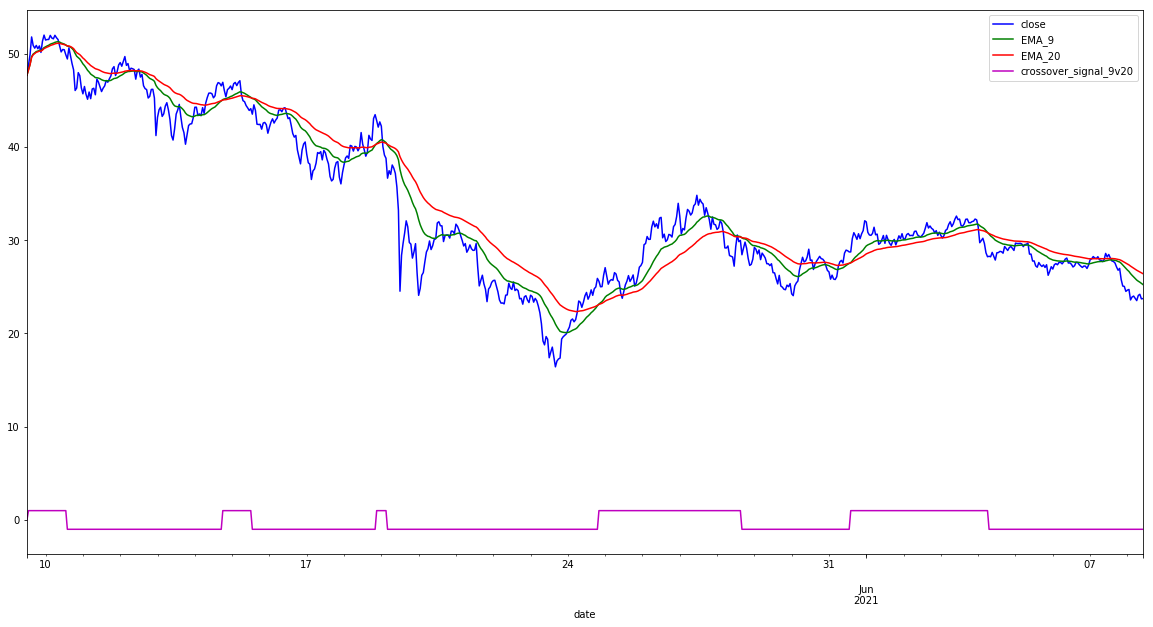

In [18]:
# Plot the EMA of LINK/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])

In [19]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

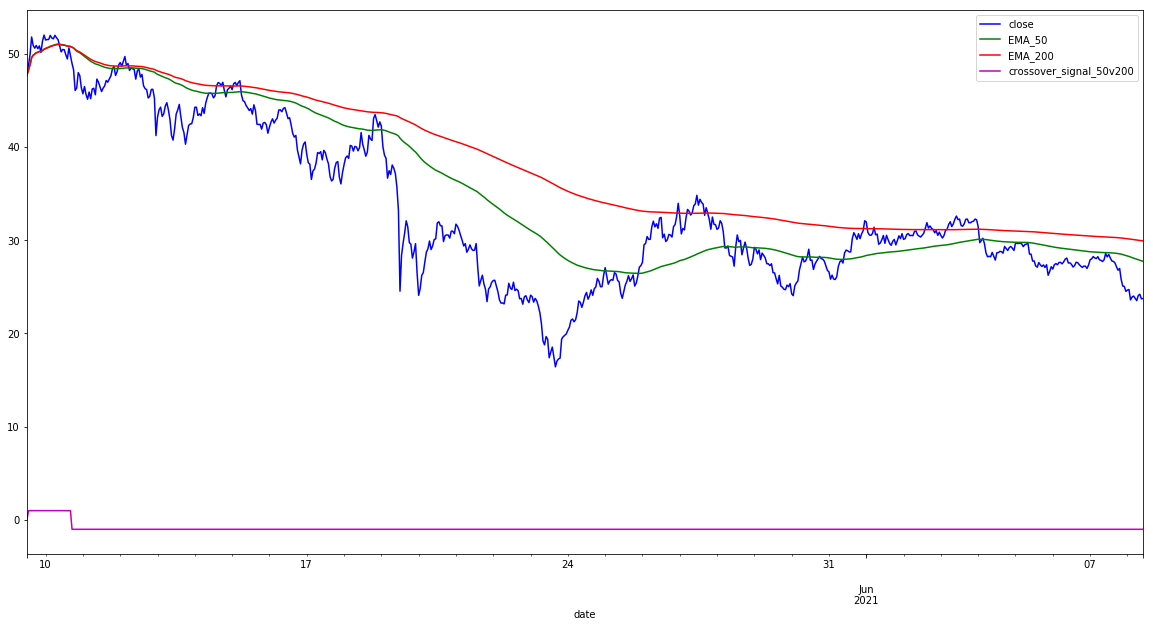

In [20]:
# Plot the EMA of LINK/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])

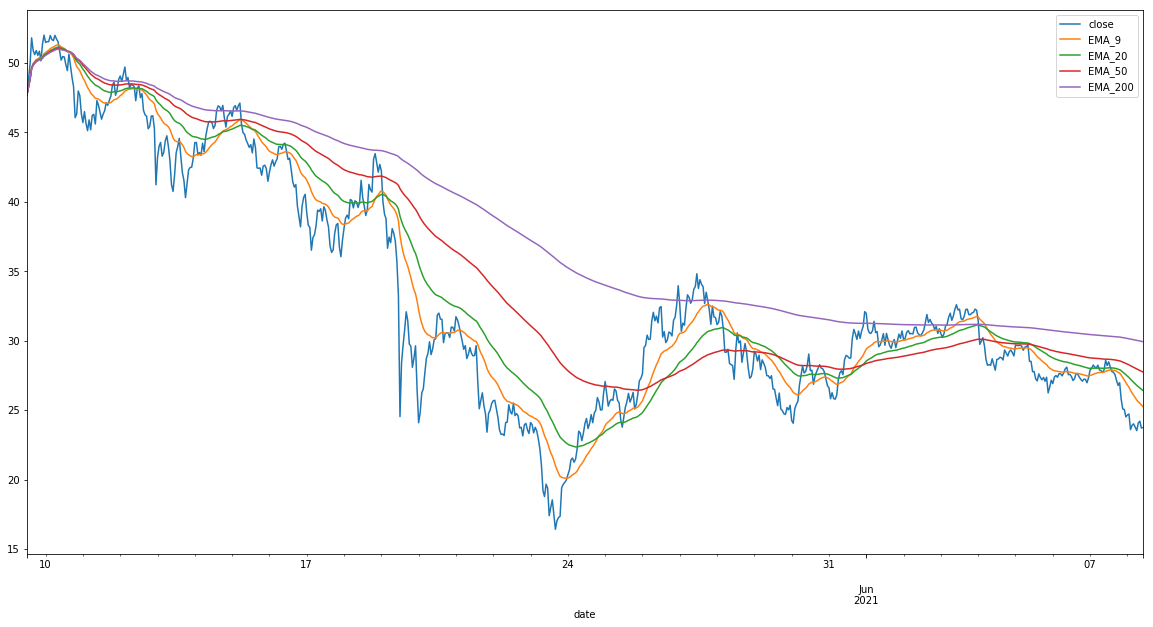

In [21]:
# Plot the EMA of LINK/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [22]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 14:00:00  1620741600000  46.11910  46.66643  46.11910  46.55429   
2021-05-11 15:00:00  1620745200000  46.56857  47.39065  46.55429  47.13410   
2021-05-11 16:00:00  1620748800000  47.48667  47.74007  46.74607  46.94687   
2021-05-11 17:00:00  1620752400000  46.92590  47.31392  46.89973  47.30236   
2021-05-11 18:00:00  1620756000000  47.28713  47.68971  47.28713  47.62206   
2021-05-11 19:00:00  1620759600000  47.66501  48.38680  47.66501  48.38680   
2021-05-11 20:00:00  1620763200000  48.32021  48.64818  48.00315  48.61872   
2021-05-11 21:00:00  1620766800000  48.65911  48.65911  47.58793  47.66812   
2021-05-11 22:00:00  1620770400000  47.82394  48.07519  47.68153  48.07519   
2021-05-11 23:00:00  1620774000000  48.13309  48.80319  48.13309  48.80319   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 14:00:00   108.668628 2021-05-11 14:00:00      0.005312  47.103893   
2021-05-11 15:00:00  1389.492589 2021-05-11 15:00:00      0.012454  47.106174   
2021-05-11 16:00:00  1265.477368 2021-05-11 16:00:00     -0.003972  47.094163   
2021-05-11 17:00:00   240.835894 2021-05-11 17:00:00      0.007572  47.109841   
2021-05-11 18:00:00   475.986052 2021-05-11 18:00:00      0.006759  47.148366   
2021-05-11 19:00:00  2348.696724 2021-05-11 19:00:00      0.016059  47.241412   
2021-05-11 20:00:00   753.104233 2021-05-11 20:00:00      0.004793  47.344787   
2021-05-11 21:00:00   624.742964 2021-05-11 21:00:00     -0.019552  47.369033   
2021-05-11 22:00:00    77.056121 2021-05-11 22:00:00      0.008540  47.421939   
2021-05-11 23:00:00   322.137117 2021-05-11 23:00:00      0.015143  47.525343   

                        EMA_20  ...  crossover_long_50v200  \
date                            ...                          
2021-05-11 14:00:00  47.983417  ...                    0.0   
2021-05-11 15:00:00  47.948772  ...                    0.0   
2021-05-11 16:00:00  47.908176  ...                    0.0   
2021-05-11 17:00:00  47.883786  ...                    0.0   
2021-05-11 18:00:00  47.873314  ...                    0.0   
2021-05-11 19:00:00  47.893738  ...                    0.0   
2021-05-11 20:00:00  47.922410  ...                    0.0   
2021-05-11 21:00:00  47.912408  ...                    0.0   
2021-05-11 22:00:00  47.918777  ...                    0.0   
2021-05-11 23:00:00  47.953207  ...                    0.0   

                     crossover_short_50v200  crossover_signal_50v200  \
date                                                                   
2021-05-11 14:00:00                    -1.0                     -1.0   
2021-05-11 15:00:00                    -1.0                     -1.0   
2021-05-11 16:00:00                    -1.0                     -1.0   
2021-05-11 17:00:00                    -1.0                     -1.0   
2021-05-11 18:00:00                    -1.0                     -1.0   
2021-05-11 19:00:00                    -1.0                     -1.0   
2021-05-11 20:00:00                    -1.0                     -1.0   
2021-05-11 21:00:00                    -1.0                     -1.0   
2021-05-11 22:00:00                    -1.0                     -1.0   
2021-05-11 23:00:00                    -1.0                     -1.0   

                     bollinger_mid_band  bollinger_std  bollinger_upper_band  \
date                                                                           
2021-05-11 14:00:00           46.300254       0.740330             47.040585   
2021-05-11 15:00:00           46.353985       0.760653             47.114639   
2021-05-11 16:00:00           46.385098       0.772030             47.157128   
2021-05-11 17:00:00           46.351459       0.711378             47.062837   
2021-05-11 18:00:00      

### Plot Bollinger Bands

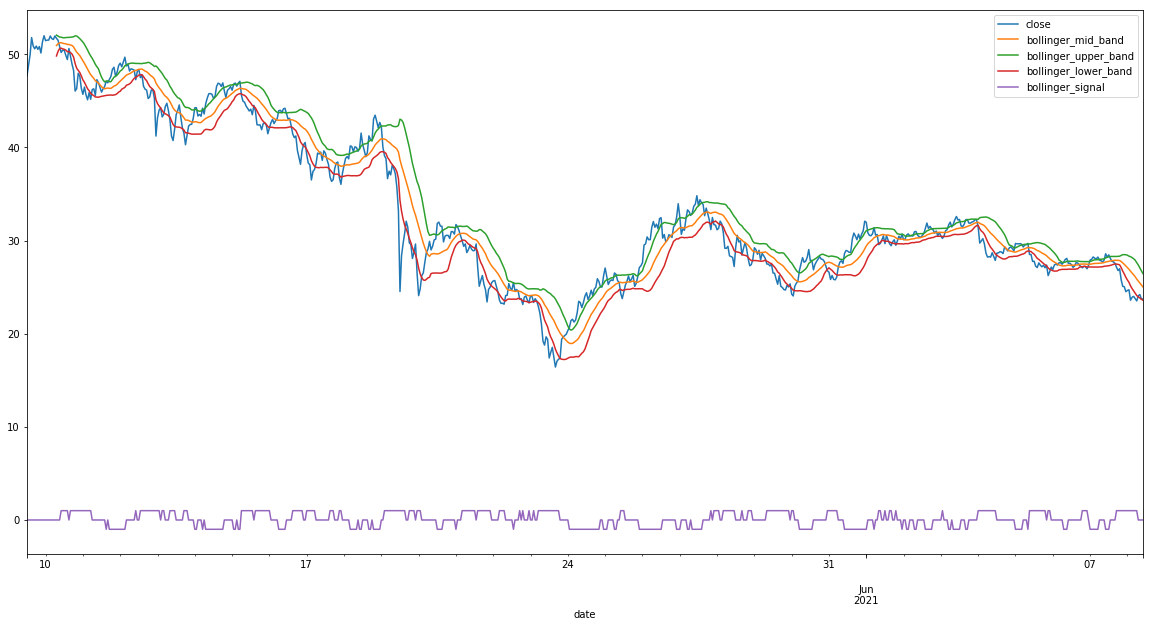

In [23]:
# Plot the Bollinger Bands for LINK/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [24]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd

historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative SELL signals
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

close  mac_fast_12  mac_slow_26      macd  \
date                                                                
2021-05-11 14:00:00  46.55429    46.449030    47.116436 -0.667407   
2021-05-11 15:00:00  47.13410    46.554425    47.117745 -0.563320   
2021-05-11 16:00:00  46.94687    46.614801    47.105087 -0.490286   
2021-05-11 17:00:00  47.30236    46.720579    47.119700 -0.399121   
2021-05-11 18:00:00  47.62206    46.859269    47.156912 -0.297643   
2021-05-11 19:00:00  48.38680    47.094274    47.248015 -0.153741   
2021-05-11 20:00:00  48.61872    47.328804    47.349549 -0.020745   
2021-05-11 21:00:00  47.66812    47.381006    47.373146  0.007860   
2021-05-11 22:00:00  48.07519    47.487804    47.425150  0.062654   
2021-05-11 23:00:00  48.80319    47.690171    47.527227  0.162944   
2021-05-12 00:00:00  49.05706    47.900462    47.640548  0.259914   
2021-05-12 01:00:00  48.66212    48.017640    47.716220  0.301420   
2021-05-12 02:00:00  49.18970    48.197957    47.825366  0.372590   
2021-05-12 03:00:00  49.70058    48.429130    47.964271  0.464858   
2021-05-12 04:00:00  48.75517    48.479290    48.022856  0.456433   
2021-05-12 05:00:00  48.94800    48.551399    48.091385  0.460014   
2021-05-12 06:00:00  48.21088    48.499011    48.100237  0.398775   
2021-05-12 07:00:00  48.45093    48.491614    48.126214  0.365400   
2021-05-12 08:00:00  48.39182    48.476261    48.145889  0.330373   
2021-05-12 09:00:00  48.30960    48.450621    48.158015  0.292606   
2021-05-12 10:00:00  47.27648    48.269984    48.092716  0.177268   
2021-05-12 11:00:00  48.17051    48.254680    48.098479  0.156201   
2021-05-12 12:00:00  48.35014    48.269366    48.117121  0.152246   
2021-05-12 13:00:00  47.50000    48.151002    48.071408  0.079594   
2021-05-12 14:00:00  47.78614    48.094870    48.050277  0.044593   
2021-05-12 15:00:00  46.57310    47.860751    47.940856 -0.080105   
2021-05-12 16:00:00  46.26211    47.614806    47.816505 -0.201698   
2021-05-12 17:00:00  46.15639    47.390435    47.693533 -0.303099   
2021-05-12 18:00:00  45.25612    47.062079    47.512984 -0.450906   
2021-05-12 19:00:00  45.43140    46.811205    47.358793 -0.547588   
2021-05-12 20:00:00  46.17338    46.713078    47.270984 -0.557906   
2021-05-12 21:00:00  46.18717    46.632169    47.190702 -0.558533   
2021-05-12 22:00:00  45.26291    46.421514    47.047902 -0.626389   
2021-05-12 23:00:00  41.22566    45.622152    46.616625 -0.994474   
2021-05-13 00:00:00  43.18796    45.247661    46.362650 -1.114989   
2021-05-13 01:00:00  43.99578    45.055064    46.187326 -1.132263   
2021-05-13 02:00:00  44.27236    44.934648    46.045477 -1.110829   
2021-05-13 03:00:00  43.28022    44.680120    45.840643 -1.160523   
2021-05-13 04:00:00  43.55515    44.507048    45.671347 -1.164299   
2021-05-13 05:00:00  44.38671    44.488534    45.576189 -1.087655   
2021-05-13 06:00:00  44.74971    44.528715    45.514968 -0.986253   
2021-05-13 07:00:00  43.99000    44.445836    45.402008 -0.956172   
2021-05-13 08:00:00  42.95477    44.216441    45.220731 -1.004290   
2021-05-13 09:00:00  41.22402    43.756069    44.924678 -1.168609   
2021-05-13 10:00:00  40.74371    43.292629    44.614977 -1.322348   
2021-05-13 11:00:00  41.95278    43.086498    44.417777 -1.331279   
2021-05-13 12:00:00  43.52829    43.154466    44.351889 -1.197423   
2021-05-13 13:00:00  43.96705    43.279479    44.323383 -1.043903   
2021-05-13 14:00:00  44.56894    43.477858    44.341572 -0.863714   
2021-05-13 15:00:00  43.25543    43.443638    44.261117 -0.817479   

                     mac_signal_line_9ema  macd_diff  macd_long  macd_short  \
date                                                                          
2021-05-11 14:00:00             -0.838962   0.171556        1.0         0.0   
2021-05-11 15:00:00             -0.783834   0.220514        1.0         0.0   
2021-05-11 16:00:00             -0.725124   0.234838        1.0         0.0   
2021-05-11 17:00:00             -0.65992

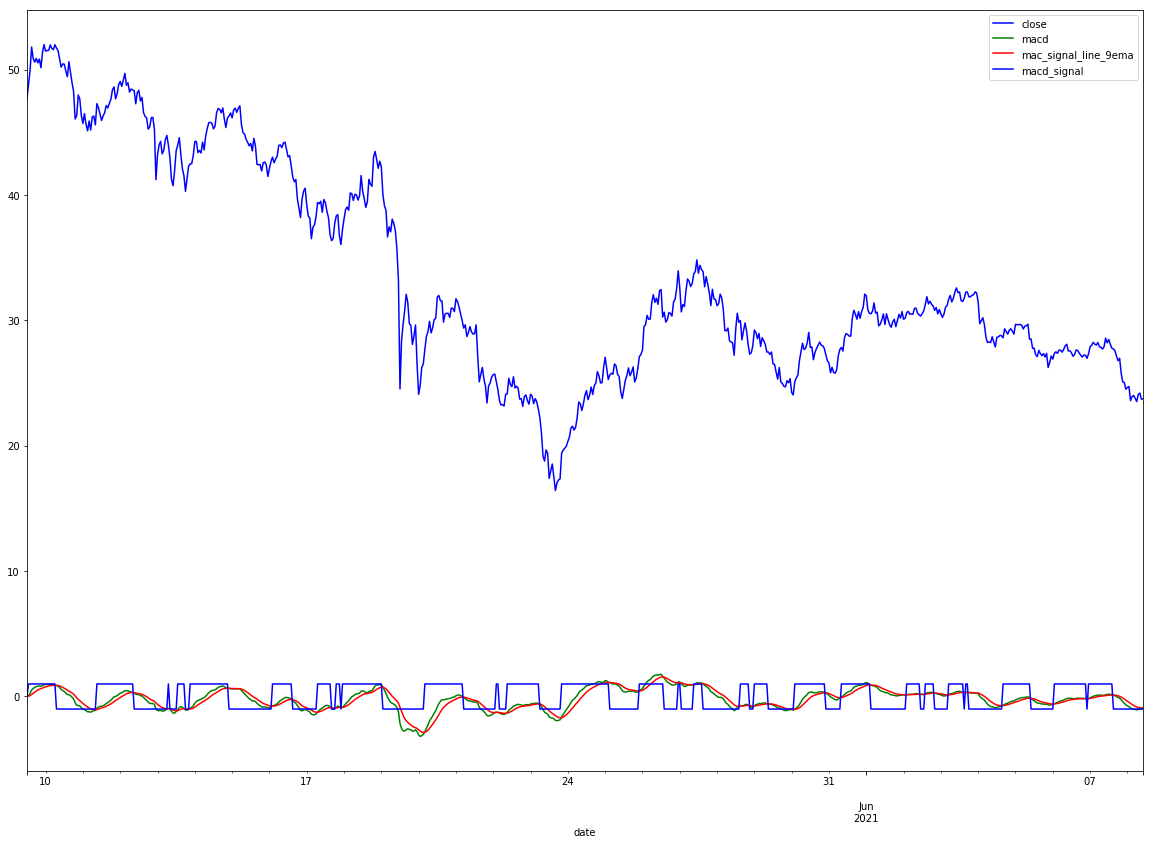

In [25]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

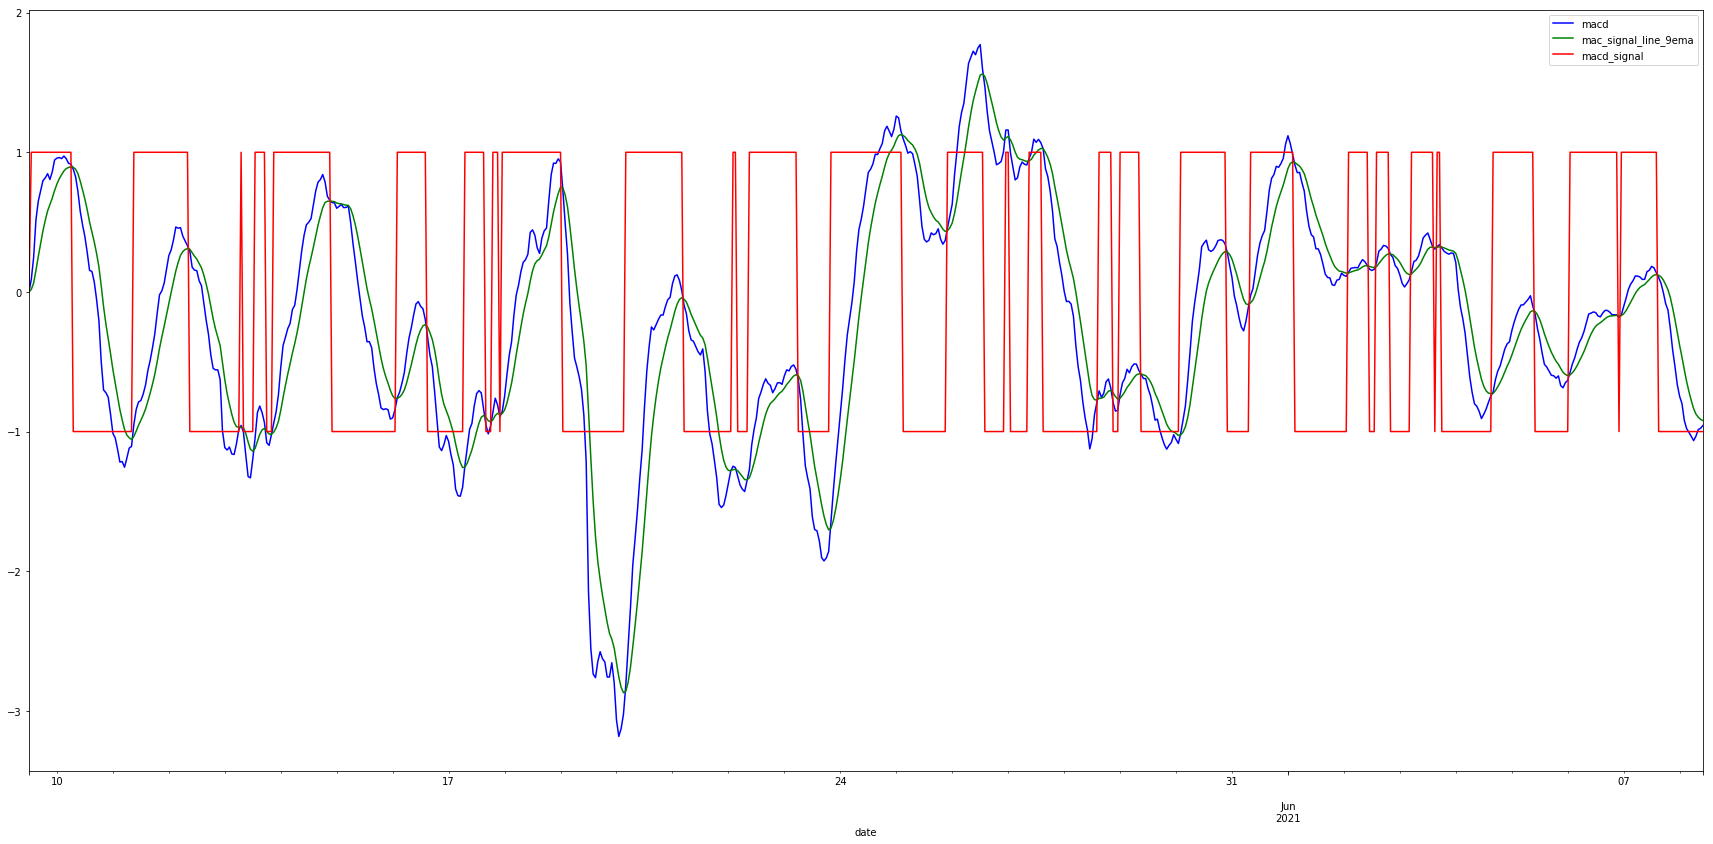

In [26]:
historical_prices_df[['macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(30,14), color=['b', 'g', 'r'])

### Build RSI Signals

In [27]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   
2021-05-09 13:00:00  1620565200000  48.15448  48.81072  48.15448  48.81072   
2021-05-09 14:00:00  1620568800000  48.86427  49.91365  48.75978  49.91365   
2021-05-09 15:00:00  1620572400000  49.86212  51.80152  49.79133  51.80152   
2021-05-09 16:00:00  1620576000000  51.86890  52.31117  50.75032  50.89869   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-09 12:00:00  1777.427578 2021-05-09 12:00:00     -0.021105  47.697080   
2021-05-09 13:00:00   834.732460 2021-05-09 13:00:00      0.023348  48.275332   
2021-05-09 14:00:00  1307.732680 2021-05-09 14:00:00      0.022596  48.863994   
2021-05-09 15:00:00  2582.096918 2021-05-09 15:00:00      0.037823  49.685262   
2021-05-09 16:00:00  4851.980910 2021-05-09 16:00:00     -0.017429  49.966690   

                        EMA_20  ...  macd_diff_gradient  \
date                            ...                       
2021-05-09 12:00:00  47.697080  ...                 NaN   
2021-05-09 13:00:00  48.263548  ...                 inf   
2021-05-09 14:00:00  48.832751  ...            1.562463   
2021-05-09 15:00:00  49.613961  ...            0.988150   
2021-05-09 16:00:00  49.889018  ...            0.096097   

                     macd_conservative_long_exit  \
date                                               
2021-05-09 12:00:00                          0.0   
2021-05-09 13:00:00                          0.0   
2021-05-09 14:00:00                          0.0   
2021-05-09 15:00:00                          0.0   
2021-05-09 16:00:00                          0.0   

                     macd_conservative_short_exit   change     gain     loss  \
date                                                                           
2021-05-09 12:00:00                           0.0      NaN      NaN      NaN   
2021-05-09 13:00:00                           1.0  1.11364  1.11364  0.00000   
2021-05-09 14:00:00                           1.0  1.10293  1.10293  0.00000   
2021-05-09 15:00:00                           1.0  1.88787  1.88787  0.00000   
2021-05-09 16:00:00                           1.0 -0.90283  0.00000  0.90283   

                     avg_gain  avg_loss  rs  rsi_14  
date                                                 
2021-05-09 12:00:00       NaN       NaN NaN     NaN  
2021-05-09 13:00:00       NaN       NaN NaN     NaN  
2021-05-09 14:00:00       NaN       NaN NaN     NaN  
2021-05-09 15:00:00       NaN       NaN NaN     NaN  
2021-05-09 16:00:00       NaN       NaN NaN     NaN  

[5 rows x 44 columns]

In [28]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold']

historical_prices_df[rsi_list].iloc[50:100]
# historical_prices_df.head()

close  daily_return        rs     rsi_14  \
date                                                               
2021-05-11 14:00:00  46.55429      0.005312  0.894336  47.211051   
2021-05-11 15:00:00  47.13410      0.012454  1.022669  50.560373   
2021-05-11 16:00:00  46.94687     -0.003972  0.978979  49.468882   
2021-05-11 17:00:00  47.30236      0.007572  1.066334  51.605103   
2021-05-11 18:00:00  47.62206      0.006759  1.150937  53.508633   
2021-05-11 19:00:00  48.38680      0.016059  1.368880  57.785964   
2021-05-11 20:00:00  48.61872      0.004793  1.440059  59.017392   
2021-05-11 21:00:00  47.66812     -0.019552  1.095774  52.284941   
2021-05-11 22:00:00  48.07519      0.008540  1.206028  54.669665   
2021-05-11 23:00:00  48.80319      0.015143  1.418373  58.649878   
2021-05-12 00:00:00  49.05706      0.005202  1.498118  59.969864   
2021-05-12 01:00:00  48.66212     -0.008051  1.321557  56.925453   
2021-05-12 02:00:00  49.18970      0.010842  1.491104  59.857158   
2021-05-12 03:00:00  49.70058      0.010386  1.667914  62.517533   
2021-05-12 04:00:00  48.75517     -0.019022  1.233331  55.223841   
2021-05-12 05:00:00  48.94800      0.003955  1.290563  56.342615   
2021-05-12 06:00:00  48.21088     -0.015059  1.044478  51.087760   
2021-05-12 07:00:00  48.45093      0.004979  1.111352  52.636974   
2021-05-12 08:00:00  48.39182     -0.001220  1.091987  52.198548   
2021-05-12 09:00:00  48.30960     -0.001699  1.064209  51.555298   
2021-05-12 10:00:00  47.27648     -0.021385  0.791694  44.186904   
2021-05-12 11:00:00  48.17051      0.018911  1.030338  50.747107   
2021-05-12 12:00:00  48.35014      0.003729  1.081975  51.968674   
2021-05-12 13:00:00  47.50000     -0.017583  0.856546  46.136549   
2021-05-12 14:00:00  47.78614      0.006024  0.932067  48.241955   
2021-05-12 15:00:00  46.57310     -0.025385  0.693099  40.936694   
2021-05-12 16:00:00  46.26211     -0.006677  0.647280  39.293868   
2021-05-12 17:00:00  46.15639     -0.002285  0.631985  38.724930   
2021-05-12 18:00:00  45.25612     -0.019505  0.519426  34.185675   
2021-05-12 19:00:00  45.43140      0.003873  0.556770  35.764427   
2021-05-12 20:00:00  46.17338      0.016332  0.727010  42.096458   
2021-05-12 21:00:00  46.18717      0.000299  0.730417  42.210476   
2021-05-12 22:00:00  45.26291     -0.020011  0.586237  36.957713   
2021-05-12 23:00:00  41.22566     -0.089196  0.303976  23.311464   
2021-05-13 00:00:00  43.18796      0.047599  0.556000  35.732649   
2021-05-13 01:00:00  43.99578      0.018705  0.667732  40.038315   
2021-05-13 02:00:00  44.27236      0.006287  0.708929  41.483811   
2021-05-13 03:00:00  43.28022     -0.022410  0.611594  37.949640   
2021-05-13 04:00:00  43.55515      0.006352  0.652567  39.488091   
2021-05-13 05:00:00  44.38671      0.019092  0.786028  44.009846   
2021-05-13 06:00:00  44.74971      0.008178  0.848769  45.909967   
2021-05-13 07:00:00  43.99000     -0.016977  0.743615  42.647898   
2021-05-13 08:00:00  42.95477     -0.023533  0.629219  38.620894   
2021-05-13 09:00:00  41.22402     -0.040292  0.492740  33.009116   
2021-05-13 10:00:00  40.74371     -0.011651  0.462744  31.635319   
2021-05-13 11:00:00  41.95278      0.029675  0.627777  38.566515   
2021-05-13 12:00:00  43.52829      0.037554  0.859370  46.218339   
2021-05-13 13:00:00  43.96705      0.010080  0.928827  48.155015   
2021-05-13 14:00:00  44.56894      0.013690  1.031437  50.773767   
2021-05-13 15:00:00  43.25543     -0.029471  0.831032  45.385982   

                     rsi_overbought  rsi_oversold  
date                                               
2021-05-11 14:00:00             0.0           0.0  
2021-05-11 15:00:00             0.0           0.0  
2021-05-11 16:00:00             0.0           0.0  
2021-05-11 17:00:00             0.0           0.0  
2021-05-11 18:00:00             0.0           0.0  
2021-05-11 19:00:00             0.0           0.0  
2021-05-11 20:00:00             0.0           0.0  
2021-05-11 21:00:00

In [29]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_periods', 'rsi_oversold_preceeding_periods']


historical_prices_df['rsi_oversold_preceeding_periods'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_periods'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_periods'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_periods'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_periods',	'rsi_oversold_preceeding_periods',	'rsi_long',	'rsi_short',	'rsi_signal']
# display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[195:230])

rs     rsi_14  rsi_overbought  rsi_oversold  \
date                                                                     
2021-05-17 15:00:00  0.543652  35.218580             0.0           0.0   
2021-05-17 16:00:00  0.502493  33.443971             0.0           0.0   
2021-05-17 17:00:00  0.532914  34.764769             0.0           0.0   
2021-05-17 18:00:00  0.753219  42.962074             0.0           0.0   
2021-05-17 19:00:00  0.873034  46.610675             0.0           0.0   
2021-05-17 20:00:00  0.895917  47.255068             0.0           0.0   
2021-05-17 21:00:00  0.645907  39.243227             0.0           0.0   
2021-05-17 22:00:00  0.572524  36.407960             0.0           0.0   
2021-05-17 23:00:00  0.777827  43.751567             0.0           0.0   
2021-05-18 00:00:00  0.932576  48.255596             0.0           0.0   
2021-05-18 01:00:00  1.080473  51.934011             0.0           0.0   
2021-05-18 02:00:00  1.124330  52.926324             0.0           0.0   
2021-05-18 03:00:00  1.061134  51.483029             0.0           0.0   
2021-05-18 04:00:00  1.385459  58.079348             0.0           0.0   
2021-05-18 05:00:00  1.361452  57.653165             0.0           0.0   
2021-05-18 06:00:00  1.191187  54.362628             0.0           0.0   
2021-05-18 07:00:00  1.317928  56.858015             0.0           0.0   
2021-05-18 08:00:00  1.294138  56.410651             0.0           0.0   
2021-05-18 09:00:00  1.159518  53.693375             0.0           0.0   
2021-05-18 10:00:00  1.254585  55.645947             0.0           0.0   
2021-05-18 11:00:00  1.732531  63.403893             0.0           0.0   
2021-05-18 12:00:00  1.240380  55.364725             0.0           0.0   
2021-05-18 13:00:00  1.079034  51.900741             0.0           0.0   
2021-05-18 14:00:00  0.931442  48.225211             0.0           0.0   
2021-05-18 15:00:00  1.023951  50.591682             0.0           0.0   
2021-05-18 16:00:00  1.441163  59.035922             0.0           0.0   
2021-05-18 17:00:00  1.316124  56.824411             0.0           0.0   
2021-05-18 18:00:00  1.264248  55.835235             0.0           0.0   
2021-05-18 19:00:00  1.860173  65.037080             0.0           0.0   
2021-05-18 20:00:00  1.973307  66.367417             0.0           0.0   
2021-05-18 21:00:00  1.661874  62.432488             0.0           0.0   
2021-05-18 22:00:00  1.400952  58.349857             0.0           0.0   
2021-05-18 23:00:00  1.536253  60.571751             0.0           0.0   
2021-05-19 00:00:00  1.373727  57.872160             0.0           0.0   
2021-05-19 01:00:00  0.886196  46.983239             0.0           0.0   

                     rsi_overbought_preceeding_periods  \
date                                                     
2021-05-17 15:00:00                                0.0   
2021-05-17 16:00:00                                0.0   
2021-05-17 17:00:00                                0.0   
2021-05-17 18:00:00                                0.0   
2021-05-17 19:00:00                                0.0   
2021-05-17 20:00:00                                0.0   
2021-05-17 21:00:00                                0.0   
2021-05-17 22:00:00                                0.0   
2021-05-17 23:00:00                                0.0   
2021-05-18 00:00:00                                0.0   
2021-05-18 01:00:00                                0.0   
2021-05-18 02:00:00                                0.0   
2021-05-18 03:00:00                                0.0   
2021-05-18 04:00:00                                0.0   
2021-05-18 05:00:00                                0.0   
2021-05-18 06:00:00                                0.0   
2021-05-18 07:00:00                                0.0   
2021-05-18 08:00:00                                0.0   
2021-05-18 09:00:00                                0.0   
2021-05-18 10:00:00                                0.0   
2021-05-18 1

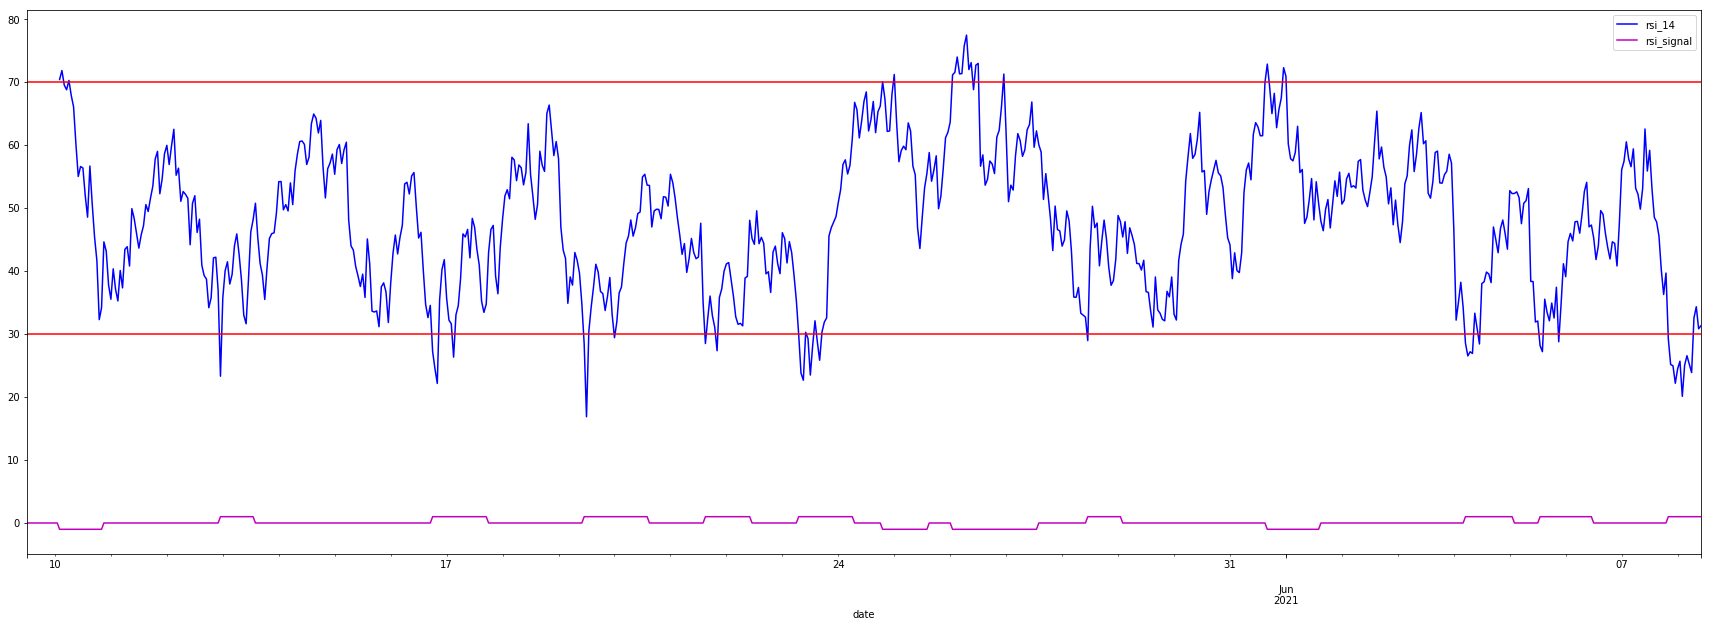

In [30]:
historical_prices_df[['rsi_14', 'rsi_signal']].plot(figsize=(30,10), color=['b', 'm'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')

In [31]:
historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   
2021-05-09 13:00:00  1620565200000  48.15448  48.81072  48.15448  48.81072   
2021-05-09 14:00:00  1620568800000  48.86427  49.91365  48.75978  49.91365   
2021-05-09 15:00:00  1620572400000  49.86212  51.80152  49.79133  51.80152   
2021-05-09 16:00:00  1620576000000  51.86890  52.31117  50.75032  50.89869   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-09 12:00:00  1777.427578 2021-05-09 12:00:00     -0.021105  47.697080   
2021-05-09 13:00:00   834.732460 2021-05-09 13:00:00      0.023348  48.275332   
2021-05-09 14:00:00  1307.732680 2021-05-09 14:00:00      0.022596  48.863994   
2021-05-09 15:00:00  2582.096918 2021-05-09 15:00:00      0.037823  49.685262   
2021-05-09 16:00:00  4851.980910 2021-05-09 16:00:00     -0.017429  49.966690   

                        EMA_20  ...  avg_loss  rs  rsi_14  rsi_oversold  \
date                            ...                                       
2021-05-09 12:00:00  47.697080  ...       NaN NaN     NaN           0.0   
2021-05-09 13:00:00  48.263548  ...       NaN NaN     NaN           0.0   
2021-05-09 14:00:00  48.832751  ...       NaN NaN     NaN           0.0   
2021-05-09 15:00:00  49.613961  ...       NaN NaN     NaN           0.0   
2021-05-09 16:00:00  49.889018  ...       NaN NaN     NaN           0.0   

                     rsi_overbought  rsi_oversold_preceeding_periods  \
date                                                                   
2021-05-09 12:00:00             0.0                              0.0   
2021-05-09 13:00:00             0.0                              0.0   
2021-05-09 14:00:00             0.0                              0.0   
2021-05-09 15:00:00             0.0                              0.0   
2021-05-09 16:00:00             0.0                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-09 12:00:00                                0.0        0.0       0.0   
2021-05-09 13:00:00                                0.0        0.0       0.0   
2021-05-09 14:00:00                                0.0        0.0       0.0   
2021-05-09 15:00:00                                0.0        0.0       0.0   
2021-05-09 16:00:00                                0.0        0.0       0.0   

                     rsi_signal  
date                             
2021-05-09 12:00:00         0.0  
2021-05-09 13:00:00         0.0  
2021-05-09 14:00:00         0.0  
2021-05-09 15:00:00         0.0  
2021-05-09 16:00:00         0.0  

[5 rows x 51 columns]

# 2. Strategy Development

In [32]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 > Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = MACD & RSI <br />
 > Strategy 3 = EMA50v200 + MACD <br />
 > Strategy 4 = EMA50v200 + EMA9v20 <br />

In [33]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal']
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal']
st3_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal']
st4_x_var_list = ['close', 'crossover_signal_50v200', 'crossover_signal_9v20']

## Strategy 1 - EMA50V200 + Bollinger

In [34]:
historical_prices_df[st1_x_var_list]

close  crossover_signal_50v200  bollinger_signal
date                                                                    
2021-05-09 12:00:00  47.69708                      0.0               0.0
2021-05-09 13:00:00  48.81072                      1.0               0.0
2021-05-09 14:00:00  49.91365                      1.0               0.0
2021-05-09 15:00:00  51.80152                      1.0               0.0
2021-05-09 16:00:00  50.89869                      1.0               0.0
2021-05-09 17:00:00  50.59835                      1.0               0.0
2021-05-09 18:00:00  50.88990                      1.0               0.0
2021-05-09 19:00:00  50.54297                      1.0               0.0
2021-05-09 20:00:00  50.84000                      1.0               0.0
2021-05-09 21:00:00  50.14513                      1.0               0.0
2021-05-09 22:00:00  51.35348                      1.0               0.0
2021-05-09 23:00:00  51.99990                      1.0               0.0
2021-05-10 00:00:00  51.47047                      1.0               0.0
2021-05-10 01:00:00  51.52938                      1.0               0.0
2021-05-10 02:00:00  51.53074                      1.0               0.0
2021-05-10 03:00:00  51.96999                      1.0               0.0
2021-05-10 04:00:00  51.68809                      1.0               0.0
2021-05-10 05:00:00  51.60000                      1.0               0.0
2021-05-10 06:00:00  51.98208                      1.0               0.0
2021-05-10 07:00:00  51.72000                      1.0               0.0
2021-05-10 08:00:00  51.52213                      1.0               0.0
2021-05-10 09:00:00  50.85370                      1.0               0.0
2021-05-10 10:00:00  50.19934                      1.0               1.0
2021-05-10 11:00:00  50.45710                      1.0               1.0
2021-05-10 12:00:00  50.42942                      1.0               1.0
2021-05-10 13:00:00  49.89203                      1.0               1.0
2021-05-10 14:00:00  49.44167                      1.0               1.0
2021-05-10 15:00:00  50.63303                      1.0               0.0
2021-05-10 16:00:00  49.79332                      1.0               1.0
2021-05-10 17:00:00  48.95640                     -1.0               1.0
...                       ...                      ...               ...
2021-06-07 05:00:00  28.23603                     -1.0              -1.0
2021-06-07 06:00:00  27.90033                     -1.0               0.0
2021-06-07 07:00:00  27.84604                     -1.0               0.0
2021-06-07 08:00:00  27.71358                     -1.0               0.0
2021-06-07 09:00:00  27.90558                     -1.0               0.0
2021-06-07 10:00:00  28.58740                     -1.0              -1.0
2021-06-07 11:00:00  28.21120                     -1.0              -1.0
2021-06-07 12:00:00  28.47458                     -1.0              -1.0
2021-06-07 13:00:00  28.09572                     -1.0               0.0
2021-06-07 14:00:00  27.77930                     -1.0               0.0
2021-06-07 15:00:00  27.72525                     -1.0               0.0
2021-06-07 16:00:00  27.56547                     -1.0               0.0
2021-06-07 17:00:00  27.13928                     -1.0               1.0
2021-06-07 18:00:00  26.78390                     -1.0               1.0
2021-06-07 19:00:00  26.97757                     -1.0               1.0
2021-06-07 20:00:00  25.77915                     -1.0               1.0
2021-06-07 21:00:00  25.08813                     -1.0               1.0
2021-06-07 22:00:00  25.05191                     -1.0               1.0
2021-06-07 23:00:00  24.51449                     -1.0               1.0
2021-06-08 00:00:00  24.65069                     -1.0               1.0
2021-06-08 01:00:00  24.72041                     -1.0               1.0
2021-06-08 02:00:00  23.59819                     -1.0               1.0
2021-06-0

In [35]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]


# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-07 15:00:00  27.72525                     -1.0               0.0   
2021-06-07 16:00:00  27.56547                     -1.0               0.0   
2021-06-07 17:00:00  27.13928                     -1.0               1.0   
2021-06-07 18:00:00  26.78390                     -1.0               1.0   
2021-06-07 19:00:00  26.97757                     -1.0               1.0   
2021-06-07 20:00:00  25.77915                     -1.0               1.0   
2021-06-07 21:00:00  25.08813                     -1.0               1.0   
2021-06-07 22:00:00  25.05191                     -1.0               1.0   
2021-06-07 23:00:00  24.51449                     -1.0               1.0   
2021-06-08 00:00:00  24.65069                     -1.0               1.0   
2021-06-08 01:00:00  24.72041                     -1.0               1.0   
2021-06-08 02:00:00  23.59819                     -1.0               1.0   
2021-06-08 03:00:00  23.91422                     -1.0               1.0   
2021-06-08 04:00:00  24.01202                     -1.0               1.0   
2021-06-08 05:00:00  23.77886                     -1.0               1.0   
2021-06-08 06:00:00  23.52668                     -1.0               1.0   
2021-06-08 07:00:00  24.08114                     -1.0               0.0   
2021-06-08 08:00:00  24.20431                     -1.0               0.0   
2021-06-08 09:00:00  23.71481                     -1.0               0.0   
2021-06-08 10:00:00  23.74600                     -1.0               0.0   

                     bollinger_shift bull_or_bear  
date                                               
2021-06-07 15:00:00              0.0         Bear  
2021-06-07 16:00:00              0.0         Bear  
2021-06-07 17:00:00              0.0         Bear  
2021-06-07 18:00:00              1.0         Bear  
2021-06-07 19:00:00              1.0         Bear  
2021-06-07 20:00:00              1.0         Bear  
2021-06-07 21:00:00              1.0         Bear  
2021-06-07 22:00:00              1.0         Bear  
2021-06-07 23:00:00              1.0         Bear  
2021-06-08 00:00:00              1.0         Bear  
2021-06-08 01:00:00              1.0         Bear  
2021-06-08 02:00:00              1.0         Bear  
2021-06-08 03:00:00              1.0         Bear  
2021-06-08 04:00:00              1.0         Bear  
2021-06-08 05:00:00              1.0         Bear  
2021-06-08 06:00:00              1.0         Bear  
2021-06-08 07:00:00              1.0         Bear  
2021-06-08 08:00:00              0.0         Bear  
2021-06-08 09:00:00              0.0         Bear  
2021-06-08 10:00:00              0.0         Bear

## Program the Conditional Logic for the Trading Strategy

In [36]:
# IF BEAR + BOLLINGER BUY (1), Position = 0
# IF BEAR + BOLLINGER SELL (-1), Position = -1
# IF BULL + BOLLINGER BUY (1), Position = 1
# IF BULL + BOLLINGER SELL (-1), Position = 0

In [37]:
st1_position_code = 0
st1_positions = []

for index, row in strategy_1.iterrows():


    # BUY SIGNALS, ONLY ENTERING TRADE WHEN PRICE REENTERS FAIR TRADING ZONE
    
    # IF BEAR + BOLL (WAS JUST) == -1, EXIT SHORT (BUY OUT)
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        st1_position_code = -1
        st1_positions.append(st1_position_code)
    
    
    # ELIF BULL + BOLL == 1 BUY
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        st1_position_code = 1
        st1_positions.append(st1_position_code)  



    # EXIT SIGNALS. LESS CONDITIONS. SELL THE SECOND TRADING CONDITIONS AREN'T FAVOURABLE


    # ELIF BEAR + BOLL == 1, EXIT SHORT / NO POSITION
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != 1):
        st1_position_code = 0
        st1_positions.append(st1_position_code)
    
    
    
    # ELIF BULL + BOLL == -1, EXIT LONG / NO POSITION
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == -1):
        st1_position_code = 0
        st1_positions.append(st1_position_code) 

    
    # ELSE : O / NA
    else:
        st1_position_code = st1_position_code
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")

# Double check the dataframes have the same row lengths
display(len(st1_positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 5)

(719, 51)

In [38]:
strategy_1['boll_ema50200_position'] = st1_positions
historical_prices_df['st1_boll_ema50200_position'] = st1_positions
# strategy_1[130:170]
strategy_1[695:830]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-07 11:00:00  28.21120                     -1.0              -1.0   
2021-06-07 12:00:00  28.47458                     -1.0              -1.0   
2021-06-07 13:00:00  28.09572                     -1.0               0.0   
2021-06-07 14:00:00  27.77930                     -1.0               0.0   
2021-06-07 15:00:00  27.72525                     -1.0               0.0   
2021-06-07 16:00:00  27.56547                     -1.0               0.0   
2021-06-07 17:00:00  27.13928                     -1.0               1.0   
2021-06-07 18:00:00  26.78390                     -1.0               1.0   
2021-06-07 19:00:00  26.97757                     -1.0               1.0   
2021-06-07 20:00:00  25.77915                     -1.0               1.0   
2021-06-07 21:00:00  25.08813                     -1.0               1.0   
2021-06-07 22:00:00  25.05191                     -1.0               1.0   
2021-06-07 23:00:00  24.51449                     -1.0               1.0   
2021-06-08 00:00:00  24.65069                     -1.0               1.0   
2021-06-08 01:00:00  24.72041                     -1.0               1.0   
2021-06-08 02:00:00  23.59819                     -1.0               1.0   
2021-06-08 03:00:00  23.91422                     -1.0               1.0   
2021-06-08 04:00:00  24.01202                     -1.0               1.0   
2021-06-08 05:00:00  23.77886                     -1.0               1.0   
2021-06-08 06:00:00  23.52668                     -1.0               1.0   
2021-06-08 07:00:00  24.08114                     -1.0               0.0   
2021-06-08 08:00:00  24.20431                     -1.0               0.0   
2021-06-08 09:00:00  23.71481                     -1.0               0.0   
2021-06-08 10:00:00  23.74600                     -1.0               0.0   

                     bollinger_shift bull_or_bear  boll_ema50200_position  
date                                                                       
2021-06-07 11:00:00             -1.0         Bear                      -1  
2021-06-07 12:00:00             -1.0         Bear                      -1  
2021-06-07 13:00:00             -1.0         Bear                      -1  
2021-06-07 14:00:00              0.0         Bear                      -1  
2021-06-07 15:00:00              0.0         Bear                      -1  
2021-06-07 16:00:00              0.0         Bear                      -1  
2021-06-07 17:00:00              0.0         Bear                       0  
2021-06-07 18:00:00              1.0         Bear                       0  
2021-06-07 19:00:00              1.0         Bear                       0  
2021-06-07 20:00:00              1.0         Bear                       0  
2021-06-07 21:00:00              1.0         Bear                       0  
2021-06-07 22:00:00              1.0         Bear                       0  
2021-06-07 23:00:00              1.0         Bear                       0  
2021-06-08 00:00:00              1.0         Bear                       0  
2021-06-08 01:00:00              1.0         Bear                       0  
2021-06-08 02:00:00              1.0         Bear                       0  
2021-06-08 03:00:00              1.0         Bear                       0  
2021-06-08 04:00:00              1.0         Bear                       0  
2021-06-08 05:00:00              1.0         Bear                       0  
2021-06-08 06:00:00              1.0         Bear                       0  
2021-06-08 07:00:00              1.0         Bear                       0  
2021-06-08 08:00:00              0.0         Bear                       0  
2021-06-08 09:00:00              0.0         Bear                       0  
2021-06-08 10:00:00              0.0         Bear                       0

In [39]:
strategy_1['boll_ema50200_position_shift'] = strategy_1['boll_ema50200_position'].shift(1)
strategy_1[50:100]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-11 14:00:00  46.55429                     -1.0               0.0   
2021-05-11 15:00:00  47.13410                     -1.0              -1.0   
2021-05-11 16:00:00  46.94687                     -1.0               0.0   
2021-05-11 17:00:00  47.30236                     -1.0              -1.0   
2021-05-11 18:00:00  47.62206                     -1.0              -1.0   
2021-05-11 19:00:00  48.38680                     -1.0              -1.0   
2021-05-11 20:00:00  48.61872                     -1.0              -1.0   
2021-05-11 21:00:00  47.66812                     -1.0              -1.0   
2021-05-11 22:00:00  48.07519                     -1.0              -1.0   
2021-05-11 23:00:00  48.80319                     -1.0              -1.0   
2021-05-12 00:00:00  49.05706                     -1.0              -1.0   
2021-05-12 01:00:00  48.66212                     -1.0              -1.0   
2021-05-12 02:00:00  49.18970                     -1.0              -1.0   
2021-05-12 03:00:00  49.70058                     -1.0              -1.0   
2021-05-12 04:00:00  48.75517                     -1.0               0.0   
2021-05-12 05:00:00  48.94800                     -1.0               0.0   
2021-05-12 06:00:00  48.21088                     -1.0               0.0   
2021-05-12 07:00:00  48.45093                     -1.0               0.0   
2021-05-12 08:00:00  48.39182                     -1.0               0.0   
2021-05-12 09:00:00  48.30960                     -1.0               0.0   
2021-05-12 10:00:00  47.27648                     -1.0               1.0   
2021-05-12 11:00:00  48.17051                     -1.0               0.0   
2021-05-12 12:00:00  48.35014                     -1.0               0.0   
2021-05-12 13:00:00  47.50000                     -1.0               1.0   
2021-05-12 14:00:00  47.78614                     -1.0               1.0   
2021-05-12 15:00:00  46.57310                     -1.0               1.0   
2021-05-12 16:00:00  46.26211                     -1.0               1.0   
2021-05-12 17:00:00  46.15639                     -1.0               1.0   
2021-05-12 18:00:00  45.25612                     -1.0               1.0   
2021-05-12 19:00:00  45.43140                     -1.0               1.0   
2021-05-12 20:00:00  46.17338                     -1.0               1.0   
2021-05-12 21:00:00  46.18717                     -1.0               1.0   
2021-05-12 22:00:00  45.26291                     -1.0               1.0   
2021-05-12 23:00:00  41.22566                     -1.0               1.0   
2021-05-13 00:00:00  43.18796                     -1.0               1.0   
2021-05-13 01:00:00  43.99578                     -1.0               1.0   
2021-05-13 02:00:00  44.27236                     -1.0               0.0   
2021-05-13 03:00:00  43.28022                     -1.0               1.0   
2021-05-13 04:00:00  43.55515                     -1.0               1.0   
2021-05-13 05:00:00  44.38671                     -1.0               0.0   
2021-05-13 06:00:00  44.74971                     -1.0               0.0   
2021-05-13 07:00:00  43.99000                     -1.0               0.0   
2021-05-13 08:00:00  42.95477                     -1.0               1.0   
2021-05-13 09:00:00  41.22402                     -1.0               1.0   
2021-05-13 10:00:00  40.74371                     -1.0               1.0   
2021-05-13 11:00:00  41.95278                     -1.0               1.0   
2021-05-13 12:00:00  43.52829                     -1.0               0.0   
2021-05-13 13:00:00  43.96705                     -1.0               0.0   
2021-05-13 14:00:00  44.56894                     -1.0               0.0   
2021-05-13 15:00:00  43.25543                     -1.0               0.0   

                     bollinger_shift bull_or_bear  boll_ema50200_positi

In [40]:
st1_signal_text = 'No Position - hold'
st1_signals = []

for index, row in strategy_1.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short'
        st1_signals.append(st1_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long'
        st1_signals.append(st1_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'No Position - hold'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Sell Short'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Hold Short Position'
        st1_signals.append(st1_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = '‘Close Long Position, Enter short Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Hold Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short Position, Enter Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Enter Long Position'
        st1_signals.append(st1_signal_text)


    # Else, Signal = none
    else:
        st1_signal_text = st1_signal_text
        st1_signals.append(st1_signal_text)


strategy_1['boll_ema50200_signals'] = st1_signals
historical_prices_df['st1_boll_ema50200_signals'] = st1_signals
strategy_1[300:350]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-22 00:00:00  25.67628                     -1.0               0.0   
2021-05-22 01:00:00  25.71049                     -1.0               0.0   
2021-05-22 02:00:00  25.10623                     -1.0               0.0   
2021-05-22 03:00:00  24.47296                     -1.0               0.0   
2021-05-22 04:00:00  23.59496                     -1.0               1.0   
2021-05-22 05:00:00  23.25600                     -1.0               1.0   
2021-05-22 06:00:00  23.27434                     -1.0               1.0   
2021-05-22 07:00:00  23.17507                     -1.0               1.0   
2021-05-22 08:00:00  24.10550                     -1.0               0.0   
2021-05-22 09:00:00  24.13861                     -1.0               0.0   
2021-05-22 10:00:00  25.38891                     -1.0               0.0   
2021-05-22 11:00:00  24.87977                     -1.0               0.0   
2021-05-22 12:00:00  24.71873                     -1.0               0.0   
2021-05-22 13:00:00  25.50121                     -1.0              -1.0   
2021-05-22 14:00:00  24.60400                     -1.0               0.0   
2021-05-22 15:00:00  24.75023                     -1.0               0.0   
2021-05-22 16:00:00  24.59348                     -1.0               0.0   
2021-05-22 17:00:00  23.72104                     -1.0               1.0   
2021-05-22 18:00:00  23.76251                     -1.0               0.0   
2021-05-22 19:00:00  23.14190                     -1.0               1.0   
2021-05-22 20:00:00  23.92980                     -1.0               0.0   
2021-05-22 21:00:00  24.05061                     -1.0               0.0   
2021-05-22 22:00:00  23.58959                     -1.0               0.0   
2021-05-22 23:00:00  23.31809                     -1.0               1.0   
2021-05-23 00:00:00  24.10602                     -1.0               0.0   
2021-05-23 01:00:00  23.96420                     -1.0               0.0   
2021-05-23 02:00:00  23.36154                     -1.0               1.0   
2021-05-23 03:00:00  23.76251                     -1.0               0.0   
2021-05-23 04:00:00  23.50000                     -1.0               0.0   
2021-05-23 05:00:00  22.93519                     -1.0               1.0   
2021-05-23 06:00:00  22.22224                     -1.0               1.0   
2021-05-23 07:00:00  21.04747                     -1.0               1.0   
2021-05-23 08:00:00  19.19553                     -1.0               1.0   
2021-05-23 09:00:00  18.78000                     -1.0               1.0   
2021-05-23 10:00:00  19.66988                     -1.0               1.0   
2021-05-23 11:00:00  19.38190                     -1.0               1.0   
2021-05-23 12:00:00  17.39710                     -1.0               1.0   
2021-05-23 13:00:00  18.00198                     -1.0               1.0   
2021-05-23 14:00:00  18.53925                     -1.0               1.0   
2021-05-23 15:00:00  17.49156                     -1.0               1.0   
2021-05-23 16:00:00  16.42264                     -1.0               1.0   
2021-05-23 17:00:00  17.04758                     -1.0               1.0   
2021-05-23 18:00:00  17.26876                     -1.0               1.0   
2021-05-23 19:00:00  17.36061                     -1.0               0.0   
2021-05-23 20:00:00  19.40401                     -1.0               0.0   
2021-05-23 21:00:00  19.65021                     -1.0               0.0   
2021-05-23 22:00:00  19.80762                     -1.0               0.0   
2021-05-23 23:00:00  19.95446                     -1.0               0.0   
2021-05-24 00:00:00  20.34191                     -1.0               0.0   
2021-05-24 01:00:00  20.68749                     -1.0              -1.0   

                     bollinger_shift bull_or_bear  boll_ema50200_positi

In [41]:
historical_prices_df.head(4)

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   
2021-05-09 13:00:00  1620565200000  48.15448  48.81072  48.15448  48.81072   
2021-05-09 14:00:00  1620568800000  48.86427  49.91365  48.75978  49.91365   
2021-05-09 15:00:00  1620572400000  49.86212  51.80152  49.79133  51.80152   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-09 12:00:00  1777.427578 2021-05-09 12:00:00     -0.021105  47.697080   
2021-05-09 13:00:00   834.732460 2021-05-09 13:00:00      0.023348  48.275332   
2021-05-09 14:00:00  1307.732680 2021-05-09 14:00:00      0.022596  48.863994   
2021-05-09 15:00:00  2582.096918 2021-05-09 15:00:00      0.037823  49.685262   

                        EMA_20  ...  rsi_14  rsi_oversold  rsi_overbought  \
date                            ...                                         
2021-05-09 12:00:00  47.697080  ...     NaN           0.0             0.0   
2021-05-09 13:00:00  48.263548  ...     NaN           0.0             0.0   
2021-05-09 14:00:00  48.832751  ...     NaN           0.0             0.0   
2021-05-09 15:00:00  49.613961  ...     NaN           0.0             0.0   

                     rsi_oversold_preceeding_periods  \
date                                                   
2021-05-09 12:00:00                              0.0   
2021-05-09 13:00:00                              0.0   
2021-05-09 14:00:00                              0.0   
2021-05-09 15:00:00                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-09 12:00:00                                0.0        0.0       0.0   
2021-05-09 13:00:00                                0.0        0.0       0.0   
2021-05-09 14:00:00                                0.0        0.0       0.0   
2021-05-09 15:00:00                                0.0        0.0       0.0   

                     rsi_signal  st1_boll_ema50200_position  \
date                                                          
2021-05-09 12:00:00         0.0                           0   
2021-05-09 13:00:00         0.0                           0   
2021-05-09 14:00:00         0.0                           0   
2021-05-09 15:00:00         0.0                           0   

                     st1_boll_ema50200_signals  
date                                            
2021-05-09 12:00:00         No Position - hold  
2021-05-09 13:00:00         No Position - hold  
2021-05-09 14:00:00         No Position - hold  
2021-05-09 15:00:00         No Position - hold  

[4 rows x 53 columns]

###Backtest strategy 1

In [42]:
#Create signal df for Strategy 1
signals_st1 = historical_prices_df[['st1_boll_ema50200_position']]
signals_st1.head(30)

st1_boll_ema50200_position
date                                           
2021-05-09 12:00:00                           0
2021-05-09 13:00:00                           0
2021-05-09 14:00:00                           0
2021-05-09 15:00:00                           0
2021-05-09 16:00:00                           0
2021-05-09 17:00:00                           0
2021-05-09 18:00:00                           0
2021-05-09 19:00:00                           0
2021-05-09 20:00:00                           0
2021-05-09 21:00:00                           0
2021-05-09 22:00:00                           0
2021-05-09 23:00:00                           0
2021-05-10 00:00:00                           0
2021-05-10 01:00:00                           0
2021-05-10 02:00:00                           0
2021-05-10 03:00:00                           0
2021-05-10 04:00:00                           0
2021-05-10 05:00:00                           0
2021-05-10 06:00:00                           0
2021-05-10 07:00:00                           0
2021-05-10 08:00:00                           0
2021-05-10 09:00:00                           0
2021-05-10 10:00:00                           0
2021-05-10 11:00:00                           0
2021-05-10 12:00:00                           0
2021-05-10 13:00:00                           0
2021-05-10 14:00:00                           0
2021-05-10 15:00:00                           1
2021-05-10 16:00:00                           1
2021-05-10 17:00:00                           1

In [44]:
# ## Backtest the Trading Strategy

# # Set initial capital
# initial_capital = float(100000)

# # Set the share size
# share_size = 500

# # Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
# signals_df['Position'] = share_size * signals_df['Entry/Exit']

# # Find the points in time where a 500 share position is bought or sold
# signals_df['Entry/Exit Position'] = signals_df['Entry/Exit'].diff()

# # Multiply share price by entry/exit positions and get the cumulatively sum
# signals_df['Portfolio Holdings'] = signals_df['close'] * signals_df['Entry/Exit Position'].cumsum()

# # Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
# signals_df['Portfolio Cash'] = initial_capital - (signals_df['close'] * signals_df['Entry/Exit Position']).cumsum()

# # Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
# signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# # Calculate the portfolio daily returns
# signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# # Calculate the cumulative returns
# signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

# # Print the DataFrame
# signals_df[60:90]

## Strategy 2 - RSI + MACD

In [45]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']

historical_prices_df[st2_x_var_list].head(20)

close  rsi_signal  macd_signal  \
date                                                     
2021-05-09 12:00:00  47.69708         0.0          0.0   
2021-05-09 13:00:00  48.81072         0.0          1.0   
2021-05-09 14:00:00  49.91365         0.0          1.0   
2021-05-09 15:00:00  51.80152         0.0          1.0   
2021-05-09 16:00:00  50.89869         0.0          1.0   
2021-05-09 17:00:00  50.59835         0.0          1.0   
2021-05-09 18:00:00  50.88990         0.0          1.0   
2021-05-09 19:00:00  50.54297         0.0          1.0   
2021-05-09 20:00:00  50.84000         0.0          1.0   
2021-05-09 21:00:00  50.14513         0.0          1.0   
2021-05-09 22:00:00  51.35348         0.0          1.0   
2021-05-09 23:00:00  51.99990         0.0          1.0   
2021-05-10 00:00:00  51.47047         0.0          1.0   
2021-05-10 01:00:00  51.52938         0.0          1.0   
2021-05-10 02:00:00  51.53074        -1.0          1.0   
2021-05-10 03:00:00  51.96999        -1.0          1.0   
2021-05-10 04:00:00  51.68809        -1.0          1.0   
2021-05-10 05:00:00  51.60000        -1.0          1.0   
2021-05-10 06:00:00  51.98208        -1.0          1.0   
2021-05-10 07:00:00  51.72000        -1.0         -1.0   

                     macd_conservative_long_exit  macd_conservative_short_exit  
date                                                                            
2021-05-09 12:00:00                          0.0                           0.0  
2021-05-09 13:00:00                          0.0                           1.0  
2021-05-09 14:00:00                          0.0                           1.0  
2021-05-09 15:00:00                          0.0                           1.0  
2021-05-09 16:00:00                          0.0                           1.0  
2021-05-09 17:00:00                         -1.0                           0.0  
2021-05-09 18:00:00                         -1.0                           0.0  
2021-05-09 19:00:00                         -1.0                           0.0  
2021-05-09 20:00:00                         -1.0                           0.0  
2021-05-09 21:00:00                         -1.0                           0.0  
2021-05-09 22:00:00                          0.0                           1.0  
2021-05-09 23:00:00                          0.0                           1.0  
2021-05-10 00:00:00                         -1.0                           0.0  
2021-05-10 01:00:00                         -1.0                           0.0  
2021-05-10 02:00:00                         -1.0                           0.0  
2021-05-10 03:00:00                         -1.0                           0.0  
2021-05-10 04:00:00                         -1.0                           0.0  
2021-05-10 05:00:00                         -1.0                           0.0  
2021-05-10 06:00:00                         -1.0                           0.0  
2021-05-10 07:00:00                         -1.0                           0.0

In [46]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 53)

In [47]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 14:00:00  46.55429         0.0          1.0   
2021-05-11 15:00:00  47.13410         0.0          1.0   
2021-05-11 16:00:00  46.94687         0.0          1.0   
2021-05-11 17:00:00  47.30236         0.0          1.0   
2021-05-11 18:00:00  47.62206         0.0          1.0   
2021-05-11 19:00:00  48.38680         0.0          1.0   
2021-05-11 20:00:00  48.61872         0.0          1.0   
2021-05-11 21:00:00  47.66812         0.0          1.0   
2021-05-11 22:00:00  48.07519         0.0          1.0   
2021-05-11 23:00:00  48.80319         0.0          1.0   
2021-05-12 00:00:00  49.05706         0.0          1.0   
2021-05-12 01:00:00  48.66212         0.0          1.0   
2021-05-12 02:00:00  49.18970         0.0          1.0   
2021-05-12 03:00:00  49.70058         0.0          1.0   
2021-05-12 04:00:00  48.75517         0.0          1.0   
2021-05-12 05:00:00  48.94800         0.0          1.0   
2021-05-12 06:00:00  48.21088         0.0          1.0   
2021-05-12 07:00:00  48.45093         0.0          1.0   
2021-05-12 08:00:00  48.39182         0.0          1.0   
2021-05-12 09:00:00  48.30960         0.0         -1.0   
2021-05-12 10:00:00  47.27648         0.0         -1.0   
2021-05-12 11:00:00  48.17051         0.0         -1.0   
2021-05-12 12:00:00  48.35014         0.0         -1.0   
2021-05-12 13:00:00  47.50000         0.0         -1.0   
2021-05-12 14:00:00  47.78614         0.0         -1.0   
2021-05-12 15:00:00  46.57310         0.0         -1.0   
2021-05-12 16:00:00  46.26211         0.0         -1.0   
2021-05-12 17:00:00  46.15639         0.0         -1.0   
2021-05-12 18:00:00  45.25612         0.0         -1.0   
2021-05-12 19:00:00  45.43140         0.0         -1.0   
2021-05-12 20:00:00  46.17338         0.0         -1.0   
2021-05-12 21:00:00  46.18717         0.0         -1.0   
2021-05-12 22:00:00  45.26291         0.0         -1.0   
2021-05-12 23:00:00  41.22566         1.0         -1.0   
2021-05-13 00:00:00  43.18796         1.0         -1.0   
2021-05-13 01:00:00  43.99578         1.0         -1.0   
2021-05-13 02:00:00  44.27236         1.0         -1.0   
2021-05-13 03:00:00  43.28022         1.0         -1.0   
2021-05-13 04:00:00  43.55515         1.0         -1.0   
2021-05-13 05:00:00  44.38671         1.0         -1.0   
2021-05-13 06:00:00  44.74971         1.0         -1.0   
2021-05-13 07:00:00  43.99000         1.0          1.0   
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 14:00:00                          0.0   
2021-05-11 15:00:00                          0.0   
2021-05-11 16:00:00                          0.0   
2021-05-11 17:00:00                          0.0   
2021-05-11 18:00:00                          0.0   
2021-05-11 19:00:00                          0.0   
2021-05-11 20:00:00                          0.0   
2021-05-11 21:00:00                         -1.0   
2021-05-11 22:00:00                         -1.0   
2021-05-11 23:00:00                          0.0   
2021-05-12 00:00:00                          0.0   
2021-05-12 01:00:00                         -1.0   
2021-05-12 02:00:00                         -1.0   
2021-05-12 03:00:00                          0.0   
2021-05-12 04:00:00                         -1.0   
2021-05-12 05:00:00                         -1.0   
2021-05-12 06:00:00                         -1.0   
2021-05-12 07:00:00

In [48]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-09 12:00:00  47.69708         0.0          0.0   
2021-05-09 13:00:00  48.81072         0.0          1.0   
2021-05-09 14:00:00  49.91365         0.0          1.0   
2021-05-09 15:00:00  51.80152         0.0          1.0   
2021-05-09 16:00:00  50.89869         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-09 12:00:00                          0.0   
2021-05-09 13:00:00                          0.0   
2021-05-09 14:00:00                          0.0   
2021-05-09 15:00:00                          0.0   
2021-05-09 16:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-09 12:00:00                           0.0  Fair price   
2021-05-09 13:00:00                           1.0  Fair price   
2021-05-09 14:00:00                           1.0  Fair price   
2021-05-09 15:00:00                           1.0  Fair price   
2021-05-09 16:00:00                           1.0  Fair price   

                     macd_signal_shift  
date                                    
2021-05-09 12:00:00                NaN  
2021-05-09 13:00:00                0.0  
2021-05-09 14:00:00                1.0  
2021-05-09 15:00:00                1.0  
2021-05-09 16:00:00                1.0

### Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [49]:
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():


    ## RSI OVERSOLD SCENARIOS


    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    


    ## RSI OVERBOUGHT SCENARIOS


    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)



    ## RSI FAIR SCENARIOS


    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)


    ## OTHER



    # ELSE : 0 / NA
    else:
        st2_position_code = st2_position_code
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 7)

(719, 53)

In [50]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['st2_rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
# strategy_2[400:450]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-09 12:00:00  47.69708         0.0          0.0   
2021-05-09 13:00:00  48.81072         0.0          1.0   
2021-05-09 14:00:00  49.91365         0.0          1.0   
2021-05-09 15:00:00  51.80152         0.0          1.0   
2021-05-09 16:00:00  50.89869         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-09 12:00:00                          0.0   
2021-05-09 13:00:00                          0.0   
2021-05-09 14:00:00                          0.0   
2021-05-09 15:00:00                          0.0   
2021-05-09 16:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-09 12:00:00                           0.0  Fair price   
2021-05-09 13:00:00                           1.0  Fair price   
2021-05-09 14:00:00                           1.0  Fair price   
2021-05-09 15:00:00                           1.0  Fair price   
2021-05-09 16:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  
date                                                           
2021-05-09 12:00:00                NaN                      0  
2021-05-09 13:00:00                0.0                      0  
2021-05-09 14:00:00                1.0                      0  
2021-05-09 15:00:00                1.0                      0  
2021-05-09 16:00:00                1.0                      0

In [51]:
strategy_2['rsi_macd_agg_position_shift'] = strategy_2['rsi_macd_agg_position'].shift(1)
# strategy_2[50:100]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-09 12:00:00  47.69708         0.0          0.0   
2021-05-09 13:00:00  48.81072         0.0          1.0   
2021-05-09 14:00:00  49.91365         0.0          1.0   
2021-05-09 15:00:00  51.80152         0.0          1.0   
2021-05-09 16:00:00  50.89869         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-09 12:00:00                          0.0   
2021-05-09 13:00:00                          0.0   
2021-05-09 14:00:00                          0.0   
2021-05-09 15:00:00                          0.0   
2021-05-09 16:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-09 12:00:00                           0.0  Fair price   
2021-05-09 13:00:00                           1.0  Fair price   
2021-05-09 14:00:00                           1.0  Fair price   
2021-05-09 15:00:00                           1.0  Fair price   
2021-05-09 16:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-09 12:00:00                NaN                      0   
2021-05-09 13:00:00                0.0                      0   
2021-05-09 14:00:00                1.0                      0   
2021-05-09 15:00:00                1.0                      0   
2021-05-09 16:00:00                1.0                      0   

                     rsi_macd_agg_position_shift  
date                                              
2021-05-09 12:00:00                          NaN  
2021-05-09 13:00:00                          0.0  
2021-05-09 14:00:00                          0.0  
2021-05-09 15:00:00                          0.0  
2021-05-09 16:00:00                          0.0

In [52]:
st2_signal = 'NA'
st2_signal_text = 'No Position - hold'
st2_signals = []

for index, row in strategy_2.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short'
        st2_signals.append(st2_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long'
        st2_signals.append(st2_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'No Position - hold'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Sell Short'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Hold Short Position'
        st2_signals.append(st2_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = '‘Close Long Position, Enter short Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Hold Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short Position, Enter Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Enter Long Position'
        st2_signals.append(st2_signal_text)


    # Else, Signal = none
    else:
        st2_signal_text = st2_signal_text
        st2_signals.append(st2_signal_text)


strategy_2['rsi_macd_agg_signals'] = st2_signals
historical_prices_df['st2_rsi_macd_agg_signals'] = st2_signals
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-11 14:00:00  46.55429         0.0          1.0   
2021-05-11 15:00:00  47.13410         0.0          1.0   
2021-05-11 16:00:00  46.94687         0.0          1.0   
2021-05-11 17:00:00  47.30236         0.0          1.0   
2021-05-11 18:00:00  47.62206         0.0          1.0   
2021-05-11 19:00:00  48.38680         0.0          1.0   
2021-05-11 20:00:00  48.61872         0.0          1.0   
2021-05-11 21:00:00  47.66812         0.0          1.0   
2021-05-11 22:00:00  48.07519         0.0          1.0   
2021-05-11 23:00:00  48.80319         0.0          1.0   
2021-05-12 00:00:00  49.05706         0.0          1.0   
2021-05-12 01:00:00  48.66212         0.0          1.0   
2021-05-12 02:00:00  49.18970         0.0          1.0   
2021-05-12 03:00:00  49.70058         0.0          1.0   
2021-05-12 04:00:00  48.75517         0.0          1.0   
2021-05-12 05:00:00  48.94800         0.0          1.0   
2021-05-12 06:00:00  48.21088         0.0          1.0   
2021-05-12 07:00:00  48.45093         0.0          1.0   
2021-05-12 08:00:00  48.39182         0.0          1.0   
2021-05-12 09:00:00  48.30960         0.0         -1.0   
2021-05-12 10:00:00  47.27648         0.0         -1.0   
2021-05-12 11:00:00  48.17051         0.0         -1.0   
2021-05-12 12:00:00  48.35014         0.0         -1.0   
2021-05-12 13:00:00  47.50000         0.0         -1.0   
2021-05-12 14:00:00  47.78614         0.0         -1.0   
2021-05-12 15:00:00  46.57310         0.0         -1.0   
2021-05-12 16:00:00  46.26211         0.0         -1.0   
2021-05-12 17:00:00  46.15639         0.0         -1.0   
2021-05-12 18:00:00  45.25612         0.0         -1.0   
2021-05-12 19:00:00  45.43140         0.0         -1.0   
2021-05-12 20:00:00  46.17338         0.0         -1.0   
2021-05-12 21:00:00  46.18717         0.0         -1.0   
2021-05-12 22:00:00  45.26291         0.0         -1.0   
2021-05-12 23:00:00  41.22566         1.0         -1.0   
2021-05-13 00:00:00  43.18796         1.0         -1.0   
2021-05-13 01:00:00  43.99578         1.0         -1.0   
2021-05-13 02:00:00  44.27236         1.0         -1.0   
2021-05-13 03:00:00  43.28022         1.0         -1.0   
2021-05-13 04:00:00  43.55515         1.0         -1.0   
2021-05-13 05:00:00  44.38671         1.0         -1.0   
2021-05-13 06:00:00  44.74971         1.0         -1.0   
2021-05-13 07:00:00  43.99000         1.0          1.0   
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 14:00:00                          0.0   
2021-05-11 15:00:00                          0.0   
2021-05-11 16:00:00                          0.0   
2021-05-11 17:00:00                          0.0   
2021-05-11 18:00:00                          0.0   
2021-05-11 19:00:00                          0.0   
2021-05-11 20:00:00                          0.0   
2021-05-11 21:00:00                         -1.0   
2021-05-11 22:00:00                         -1.0   
2021-05-11 23:00:00                          0.0   
2021-05-12 00:00:00                          0.0   
2021-05-12 01:00:00                         -1.0   
2021-05-12 02:00:00                         -1.0   
2021-05-12 03:00:00                          0.0   
2021-05-12 04:00:00                         -1.0   
2021-05-12 05:00:00                         -1.0   
2021-05-12 06:00:00                         -1.0   
2021-05-12 07:00:00

## Strategy 3 - EMA50V200 + MACD

In [53]:
historical_prices_df[st3_x_var_list].iloc[550:570]
historical_prices_df.shape

(719, 55)

In [54]:
# Filter by x-variable list
strategy_3 = historical_prices_df[st3_x_var_list]

# Define long and short position conditions
strategy_3['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_3.iloc[509:528]
strategy_3['macd_signal_shift'] = strategy_3['macd_signal'].shift(1)

strategy_3.head(5)

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-09 12:00:00  47.69708                      0.0          0.0   
2021-05-09 13:00:00  48.81072                      1.0          1.0   
2021-05-09 14:00:00  49.91365                      1.0          1.0   
2021-05-09 15:00:00  51.80152                      1.0          1.0   
2021-05-09 16:00:00  50.89869                      1.0          1.0   

                    bull_or_bear  macd_signal_shift  
date                                                 
2021-05-09 12:00:00         Bull                NaN  
2021-05-09 13:00:00         Bull                0.0  
2021-05-09 14:00:00         Bull                1.0  
2021-05-09 15:00:00         Bull                1.0  
2021-05-09 16:00:00         Bull                1.0

In [55]:
strategy_3.shape

(719, 5)

## Program the Conditional Logic for the Trading Strategy

In [56]:
st3_position_code = 0
st3_positions = []

for index, row in strategy_3.iterrows():
    
    # If EMA50v200 = 1 (BULL) and MACD CROSSES ABOVE SIGNAL (1) BUY
    if (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 1
        st3_positions.append(st3_position_code)


    # If EMA50v200 = 1 (BULL) and MACD CROSSES BELOW SIGNAL (-1) No Position
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)


    # If EMA50v200 = -1 (BEAR) and MACD CROSSES ABOVE SIGNAL (1) No Position
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)



    # If EMA50v200 = -1 (BEAR) and MACD CROSSES BELOW SIGNAL (-1) SELL
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = -1
        st3_positions.append(st3_position_code)


    # ELSE : 0 / NA
    # This wasn't working as st3_position = st3_position??
    else:
        st3_position_code = st3_position_code
        st3_positions.append(st3_position_code)

    

# Double check the dataframes have the same row lengths
display(len(st3_positions))
display(strategy_3.shape)
display(historical_prices_df.shape)    

719

(719, 5)

(719, 55)

In [57]:
strategy_3['ema50200_macd_position'] = st3_positions
historical_prices_df['st3_ema50200_macd_position'] = st3_positions
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-09 12:00:00  47.69708                      0.0          0.0   
2021-05-09 13:00:00  48.81072                      1.0          1.0   
2021-05-09 14:00:00  49.91365                      1.0          1.0   
2021-05-09 15:00:00  51.80152                      1.0          1.0   
2021-05-09 16:00:00  50.89869                      1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  
date                                                                         
2021-05-09 12:00:00         Bull                NaN                       0  
2021-05-09 13:00:00         Bull                0.0                       1  
2021-05-09 14:00:00         Bull                1.0                       1  
2021-05-09 15:00:00         Bull                1.0                       1  
2021-05-09 16:00:00         Bull                1.0                       1

### CALCULATE SIGNALS

In [58]:
strategy_3['ema50200_macd_position_shift'] = strategy_3['ema50200_macd_position'].shift(1)
strategy_3

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-09 12:00:00  47.69708                      0.0          0.0   
2021-05-09 13:00:00  48.81072                      1.0          1.0   
2021-05-09 14:00:00  49.91365                      1.0          1.0   
2021-05-09 15:00:00  51.80152                      1.0          1.0   
2021-05-09 16:00:00  50.89869                      1.0          1.0   
2021-05-09 17:00:00  50.59835                      1.0          1.0   
2021-05-09 18:00:00  50.88990                      1.0          1.0   
2021-05-09 19:00:00  50.54297                      1.0          1.0   
2021-05-09 20:00:00  50.84000                      1.0          1.0   
2021-05-09 21:00:00  50.14513                      1.0          1.0   
2021-05-09 22:00:00  51.35348                      1.0          1.0   
2021-05-09 23:00:00  51.99990                      1.0          1.0   
2021-05-10 00:00:00  51.47047                      1.0          1.0   
2021-05-10 01:00:00  51.52938                      1.0          1.0   
2021-05-10 02:00:00  51.53074                      1.0          1.0   
2021-05-10 03:00:00  51.96999                      1.0          1.0   
2021-05-10 04:00:00  51.68809                      1.0          1.0   
2021-05-10 05:00:00  51.60000                      1.0          1.0   
2021-05-10 06:00:00  51.98208                      1.0          1.0   
2021-05-10 07:00:00  51.72000                      1.0         -1.0   
2021-05-10 08:00:00  51.52213                      1.0         -1.0   
2021-05-10 09:00:00  50.85370                      1.0         -1.0   
2021-05-10 10:00:00  50.19934                      1.0         -1.0   
2021-05-10 11:00:00  50.45710                      1.0         -1.0   
2021-05-10 12:00:00  50.42942                      1.0         -1.0   
2021-05-10 13:00:00  49.89203                      1.0         -1.0   
2021-05-10 14:00:00  49.44167                      1.0         -1.0   
2021-05-10 15:00:00  50.63303                      1.0         -1.0   
2021-05-10 16:00:00  49.79332                      1.0         -1.0   
2021-05-10 17:00:00  48.95640                     -1.0         -1.0   
...                       ...                      ...          ...   
2021-06-07 05:00:00  28.23603                     -1.0          1.0   
2021-06-07 06:00:00  27.90033                     -1.0          1.0   
2021-06-07 07:00:00  27.84604                     -1.0          1.0   
2021-06-07 08:00:00  27.71358                     -1.0          1.0   
2021-06-07 09:00:00  27.90558                     -1.0          1.0   
2021-06-07 10:00:00  28.58740                     -1.0          1.0   
2021-06-07 11:00:00  28.21120                     -1.0          1.0   
2021-06-07 12:00:00  28.47458                     -1.0          1.0   
2021-06-07 13:00:00  28.09572                     -1.0          1.0   
2021-06-07 14:00:00  27.77930                     -1.0          1.0   
2021-06-07 15:00:00  27.72525                     -1.0         -1.0   
2021-06-07 16:00:00  27.56547                     -1.0         -1.0   
2021-06-07 17:00:00  27.13928                     -1.0         -1.0   
2021-06-07 18:00:00  26.78390                     -1.0         -1.0   
2021-06-07 19:00:00  26.97757                     -1.0         -1.0   
2021-06-07 20:00:00  25.77915                     -1.0         -1.0   
2021-06-07 21:00:00  25.08813                     -1.0         -1.0   
2021-06-07 22:00:00  25.05191                     -1.0         -1.0   
2021-06-07 23:00:00  24.51449                     -1.0         -1.0   
2021-06-08 00:00:00  24.65069                     -1.0         -1.0   
2021-06-08 01:00:00  24.72041                     -1.0         -1.0   
2021-06-08 02:00:00  23.59819                     -1.0         -1.0   
2021-06-08 03:00:00  23.91422                     -1.0         -1.0   
2021-06-08 04:00:00  24.01202                   

In [59]:
st3_signal_text = 'No Position - hold'
st3_signals = []

for index, row in strategy_3.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short'
        st3_signals.append(st3_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long'
        st3_signals.append(st3_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'No Position - hold'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Sell Short'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Hold Short Position'
        st3_signals.append(st3_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = '‘Close Long Position, Enter short Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Hold Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short Position, Enter Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Enter Long Position'
        st3_signals.append(st3_signal_text)


    # Else, Signal = none
    else:
        st3_signal_text = st3_signal_text
        st3_signals.append(st3_signal_text)


strategy_3['ema50200_macd_signal'] = st3_signals
historical_prices_df['st3_rsi_macd_agg_signals'] = st3_signals
strategy_3[0:50]

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-09 12:00:00  47.69708                      0.0          0.0   
2021-05-09 13:00:00  48.81072                      1.0          1.0   
2021-05-09 14:00:00  49.91365                      1.0          1.0   
2021-05-09 15:00:00  51.80152                      1.0          1.0   
2021-05-09 16:00:00  50.89869                      1.0          1.0   
2021-05-09 17:00:00  50.59835                      1.0          1.0   
2021-05-09 18:00:00  50.88990                      1.0          1.0   
2021-05-09 19:00:00  50.54297                      1.0          1.0   
2021-05-09 20:00:00  50.84000                      1.0          1.0   
2021-05-09 21:00:00  50.14513                      1.0          1.0   
2021-05-09 22:00:00  51.35348                      1.0          1.0   
2021-05-09 23:00:00  51.99990                      1.0          1.0   
2021-05-10 00:00:00  51.47047                      1.0          1.0   
2021-05-10 01:00:00  51.52938                      1.0          1.0   
2021-05-10 02:00:00  51.53074                      1.0          1.0   
2021-05-10 03:00:00  51.96999                      1.0          1.0   
2021-05-10 04:00:00  51.68809                      1.0          1.0   
2021-05-10 05:00:00  51.60000                      1.0          1.0   
2021-05-10 06:00:00  51.98208                      1.0          1.0   
2021-05-10 07:00:00  51.72000                      1.0         -1.0   
2021-05-10 08:00:00  51.52213                      1.0         -1.0   
2021-05-10 09:00:00  50.85370                      1.0         -1.0   
2021-05-10 10:00:00  50.19934                      1.0         -1.0   
2021-05-10 11:00:00  50.45710                      1.0         -1.0   
2021-05-10 12:00:00  50.42942                      1.0         -1.0   
2021-05-10 13:00:00  49.89203                      1.0         -1.0   
2021-05-10 14:00:00  49.44167                      1.0         -1.0   
2021-05-10 15:00:00  50.63303                      1.0         -1.0   
2021-05-10 16:00:00  49.79332                      1.0         -1.0   
2021-05-10 17:00:00  48.95640                     -1.0         -1.0   
2021-05-10 18:00:00  48.27648                     -1.0         -1.0   
2021-05-10 19:00:00  46.05948                     -1.0         -1.0   
2021-05-10 20:00:00  46.32462                     -1.0         -1.0   
2021-05-10 21:00:00  47.97513                     -1.0         -1.0   
2021-05-10 22:00:00  47.64895                     -1.0         -1.0   
2021-05-10 23:00:00  46.33913                     -1.0         -1.0   
2021-05-11 00:00:00  45.70346                     -1.0         -1.0   
2021-05-11 01:00:00  46.48897                     -1.0         -1.0   
2021-05-11 02:00:00  45.64364                     -1.0         -1.0   
2021-05-11 03:00:00  45.12087                     -1.0         -1.0   
2021-05-11 04:00:00  45.89703                     -1.0         -1.0   
2021-05-11 05:00:00  45.18302                     -1.0         -1.0   
2021-05-11 06:00:00  46.22390                     -1.0         -1.0   
2021-05-11 07:00:00  46.29884                     -1.0         -1.0   
2021-05-11 08:00:00  45.60073                     -1.0         -1.0   
2021-05-11 09:00:00  47.28453                     -1.0          1.0   
2021-05-11 10:00:00  46.95452                     -1.0          1.0   
2021-05-11 11:00:00  46.45000                     -1.0          1.0   
2021-05-11 12:00:00  45.94570                     -1.0          1.0   
2021-05-11 13:00:00  46.30828                     -1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-09 12:00:00         Bull                NaN                       0   
2021-05-09 13:00:00         Bull                0.0                       1   
2021-05-09 14:0

## Strategy 4 - EMA200v50 + EMA200v50

In [60]:
# Filter by x-variable list
strategy_4 = historical_prices_df[st4_x_var_list]

# Define long and short position conditions
strategy_4['ema50v200_bull_or_bear'] = np.where(strategy_4['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_4.iloc[509:528]
strategy_4.tail(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-08 06:00:00  23.52668                     -1.0                   -1.0   
2021-06-08 07:00:00  24.08114                     -1.0                   -1.0   
2021-06-08 08:00:00  24.20431                     -1.0                   -1.0   
2021-06-08 09:00:00  23.71481                     -1.0                   -1.0   
2021-06-08 10:00:00  23.74600                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  
date                                        
2021-06-08 06:00:00                   Bear  
2021-06-08 07:00:00                   Bear  
2021-06-08 08:00:00                   Bear  
2021-06-08 09:00:00                   Bear  
2021-06-08 10:00:00                   Bear

## Program the Conditional Logic for the Trading Strategy

In [61]:
# Istantiate variables 
st4_position_code = 0
st4_positions = []

for index, row in strategy_4.iterrows():


    # IF BEAR (50v200 = -1) AND EMA9v20 = 1 : NO POSITION (Position = 0)
    if (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # IF BEAR (50v200 = -1) AND EMA9v20 = -1 : SHORT (Position = -1)
    elif (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = -1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = 1 : LONG (Position = 1)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = -1 : NO POSITION (Position = 0)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # ELSE
    else:
        st4_position_code = st4_position_code
        st4_positions.append(st4_position_code)

# Double check the dataframes have the same row lengths
display(len(st4_positions))
display(strategy_4.shape)
display(historical_prices_df.shape)

719

(719, 4)

(719, 57)

In [62]:
strategy_4['st4_ema200v50_ema9v20'] = st4_positions
historical_prices_df['st4_st4_ema200v50_ema9v20'] = st4_positions
# strategy_4[130:170]
strategy_4[695:830]

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-07 11:00:00  28.21120                     -1.0                   -1.0   
2021-06-07 12:00:00  28.47458                     -1.0                   -1.0   
2021-06-07 13:00:00  28.09572                     -1.0                   -1.0   
2021-06-07 14:00:00  27.77930                     -1.0                   -1.0   
2021-06-07 15:00:00  27.72525                     -1.0                   -1.0   
2021-06-07 16:00:00  27.56547                     -1.0                   -1.0   
2021-06-07 17:00:00  27.13928                     -1.0                   -1.0   
2021-06-07 18:00:00  26.78390                     -1.0                   -1.0   
2021-06-07 19:00:00  26.97757                     -1.0                   -1.0   
2021-06-07 20:00:00  25.77915                     -1.0                   -1.0   
2021-06-07 21:00:00  25.08813                     -1.0                   -1.0   
2021-06-07 22:00:00  25.05191                     -1.0                   -1.0   
2021-06-07 23:00:00  24.51449                     -1.0                   -1.0   
2021-06-08 00:00:00  24.65069                     -1.0                   -1.0   
2021-06-08 01:00:00  24.72041                     -1.0                   -1.0   
2021-06-08 02:00:00  23.59819                     -1.0                   -1.0   
2021-06-08 03:00:00  23.91422                     -1.0                   -1.0   
2021-06-08 04:00:00  24.01202                     -1.0                   -1.0   
2021-06-08 05:00:00  23.77886                     -1.0                   -1.0   
2021-06-08 06:00:00  23.52668                     -1.0                   -1.0   
2021-06-08 07:00:00  24.08114                     -1.0                   -1.0   
2021-06-08 08:00:00  24.20431                     -1.0                   -1.0   
2021-06-08 09:00:00  23.71481                     -1.0                   -1.0   
2021-06-08 10:00:00  23.74600                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  
date                                                               
2021-06-07 11:00:00                   Bear                     -1  
2021-06-07 12:00:00                   Bear                     -1  
2021-06-07 13:00:00                   Bear                     -1  
2021-06-07 14:00:00                   Bear                     -1  
2021-06-07 15:00:00                   Bear                     -1  
2021-06-07 16:00:00                   Bear                     -1  
2021-06-07 17:00:00                   Bear                     -1  
2021-06-07 18:00:00                   Bear                     -1  
2021-06-07 19:00:00                   Bear                     -1  
2021-06-07 20:00:00                   Bear                     -1  
2021-06-07 21:00:00                   Bear                     -1  
2021-06-07 22:00:00                   Bear                     -1  
2021-06-07 23:00:00                   Bear                     -1  
2021-06-08 00:00:00                   Bear                     -1  
2021-06-08 01:00:00                   Bear                     -1  
2021-06-08 02:00:00                   Bear                     -1  
2021-06-08 03:00:00                   Bear                     -1  
2021-06-08 04:00:00                   Bear                     -1  
2021-06-08 05:00:00                   Bear                     -1  
2021-06-08 06:00:00                   Bear                     -1  
2021-06-08 07:00:00                   Bear                     -1  
2021-06-08 08:00:00                   Bear                     -1  
2021-06-08 09:00:00                   Bear                     -1  
2021-06-08 10:00:00                   Bear                     -1

In [63]:
strategy_4['st4_ema200v50_ema9v20_shift'] = strategy_4['st4_ema200v50_ema9v20'].shift(1)
strategy_4.head(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-09 12:00:00  47.69708                      0.0                    0.0   
2021-05-09 13:00:00  48.81072                      1.0                    1.0   
2021-05-09 14:00:00  49.91365                      1.0                    1.0   
2021-05-09 15:00:00  51.80152                      1.0                    1.0   
2021-05-09 16:00:00  50.89869                      1.0                    1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-09 12:00:00                   Bull                      0   
2021-05-09 13:00:00                   Bull                      1   
2021-05-09 14:00:00                   Bull                      1   
2021-05-09 15:00:00                   Bull                      1   
2021-05-09 16:00:00                   Bull                      1   

                     st4_ema200v50_ema9v20_shift  
date                                              
2021-05-09 12:00:00                          NaN  
2021-05-09 13:00:00                          0.0  
2021-05-09 14:00:00                          1.0  
2021-05-09 15:00:00                          1.0  
2021-05-09 16:00:00                          1.0

In [88]:
st4_signal_text = 'No Position - hold'
st4_signals = []

for index, row in strategy_4.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short'
        st4_signals.append(st4_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Close Long'
        st4_signals.append(st4_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'No Position - hold'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Sell Short'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Hold Short Position'
        st4_signals.append(st4_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = '‘Close Long Position, Enter short Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Hold Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short Position, Enter Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Enter Long Position'
        st4_signals.append(st4_signal_text)


    # Else, Signal = none
    else:
        st4_signal_text = st4_signal_text
        st4_signals.append(st4_signal_text)


strategy_4['boll_ema50200_signals'] = st4_signals
historical_prices_df['st4_boll_ema50200_signals'] = st4_signals
strategy_4.head()

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-09 12:00:00  47.69708                      0.0                    0.0   
2021-05-09 13:00:00  48.81072                      1.0                    1.0   
2021-05-09 14:00:00  49.91365                      1.0                    1.0   
2021-05-09 15:00:00  51.80152                      1.0                    1.0   
2021-05-09 16:00:00  50.89869                      1.0                    1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-09 12:00:00                   Bull                      0   
2021-05-09 13:00:00                   Bull                      1   
2021-05-09 14:00:00                   Bull                      1   
2021-05-09 15:00:00                   Bull                      1   
2021-05-09 16:00:00                   Bull                      1   

                     st4_ema200v50_ema9v20_shift boll_ema50200_signals  
date                                                                    
2021-05-09 12:00:00                          NaN    No Position - hold  
2021-05-09 13:00:00                          0.0   Enter Long Position  
2021-05-09 14:00:00                          1.0    Hold Long Position  
2021-05-09 15:00:00                          1.0    Hold Long Position  
2021-05-09 16:00:00                          1.0    Hold Long Position

In [65]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal
st1_boll_ema50200_position
st1_boll_ema50200_signals
st2_rsi_macd_agg_position
st2_rsi_macd_agg_signals
st3_ema50200_macd_position
st3_rsi_macd_agg_signals
st4_st4_ema200v50_ema9v20
st4_boll_ema50200_signals


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

In [66]:
#Create a new dataframe for ML training


In [67]:
historical_prices_df.head(1)

timestamp      open      high       low     close  \
date                                                                         
2021-05-09 12:00:00  1620561600000  48.41414  49.06728  47.61288  47.69708   

                          volume                date  daily_return     EMA_9  \
date                                                                           
2021-05-09 12:00:00  1777.427578 2021-05-09 12:00:00     -0.021105  47.69708   

                       EMA_20  ...  rsi_long  rsi_signal  \
date                           ...                         
2021-05-09 12:00:00  47.69708  ...       0.0         0.0   

                     st1_boll_ema50200_position  st1_boll_ema50200_signals  \
date                                                                         
2021-05-09 12:00:00                           0         No Position - hold   

                     st2_rsi_macd_agg_position  st2_rsi_macd_agg_signals  \
date                                                                       
2021-05-09 12:00:00                          0        No Position - hold   

                     st3_ema50200_macd_position  st3_rsi_macd_agg_signals  \
date                                                                        
2021-05-09 12:00:00                           0        No Position - hold   

                     st4_st4_ema200v50_ema9v20  st4_boll_ema50200_signals  
date                                                                       
2021-05-09 12:00:00                          0         No Position - hold  

[1 rows x 59 columns]

In [68]:
x_input_list = ['daily_return', 'volume', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200', 'mac_fast_12', 'mac_slow_26', 'rsi_oversold', 'rsi_overbought']
x_input_list2 = ['EMA_9', 'EMA_20']
x_input_list3 = ['daily_return', 'volume', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200', 'mac_fast_12', 'mac_slow_26', 'rsi_oversold', 'rsi_overbought']
x_input_list4 = ['daily_return', 'volume', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200', 'mac_fast_12', 'mac_slow_26', 'rsi_oversold', 'rsi_overbought']
x_input_list5 = ['daily_return', 'volume', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200', 'mac_fast_12', 'mac_slow_26', 'rsi_oversold', 'rsi_overbought']
x_input_list6 = ['daily_return', 'volume', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200', 'mac_fast_12', 'mac_slow_26', 'rsi_oversold', 'rsi_overbought']
x_input_list7 = ['daily_return', 'volume', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200', 'mac_fast_12', 'mac_slow_26', 'rsi_oversold', 'rsi_overbought']


In [69]:
model_df = historical_prices_df[x_input_list]
model_df.head(1)

daily_return       volume     EMA_9    EMA_20    EMA_50  \
date                                                                           
2021-05-09 12:00:00     -0.021105  1777.427578  47.69708  47.69708  47.69708   

                      EMA_200  mac_fast_12  mac_slow_26  rsi_oversold  \
date                                                                    
2021-05-09 12:00:00  47.69708     47.69708     47.69708           0.0   

                     rsi_overbought  
date                                 
2021-05-09 12:00:00             0.0

In [73]:
#Create 'positive_return' which indicates a 1 (buy signal) on positive return and 0 on negative return
model_df['positive_return'] = np.where(model_df['daily_return'] > 0, 1, 0)
model_df['Strategy Returns'] = model_df['daily_return'] * model_df['positive_return'].shift()
model_df.head()
#model_df.tail()

daily_return       volume      EMA_9     EMA_20  \
date                                                                   
2021-05-09 12:00:00     -0.021105  1777.427578  47.697080  47.697080   
2021-05-09 13:00:00      0.023348   834.732460  48.275332  48.263548   
2021-05-09 14:00:00      0.022596  1307.732680  48.863994  48.832751   
2021-05-09 15:00:00      0.037823  2582.096918  49.685262  49.613961   
2021-05-09 16:00:00     -0.017429  4851.980910  49.966690  49.889018   

                        EMA_50    EMA_200  mac_fast_12  mac_slow_26  \
date                                                                  
2021-05-09 12:00:00  47.697080  47.697080    47.697080    47.697080   
2021-05-09 13:00:00  48.257760  48.254865    47.868409    47.779572   
2021-05-09 14:00:00  48.817392  48.809711    48.183062    47.937652   
2021-05-09 15:00:00  49.579008  49.561556    48.739748    48.223864   
2021-05-09 16:00:00  49.850313  49.830839    49.071893    48.421999   

                     rsi_oversold  rsi_overbought  positive_return  \
date                                                                 
2021-05-09 12:00:00           0.0             0.0                0   
2021-05-09 13:00:00           0.0             0.0                1   
2021-05-09 14:00:00           0.0             0.0                1   
2021-05-09 15:00:00           0.0             0.0                1   
2021-05-09 16:00:00           0.0             0.0                0   

                     Strategy Returns  
date                                   
2021-05-09 12:00:00               NaN  
2021-05-09 13:00:00          0.000000  
2021-05-09 14:00:00          0.022596  
2021-05-09 15:00:00          0.037823  
2021-05-09 16:00:00         -0.017429

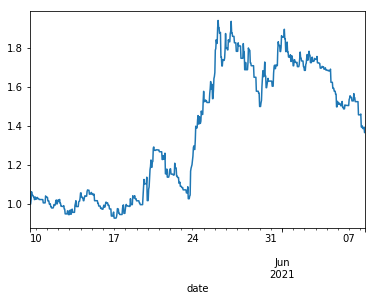

In [71]:
(1 + model_df['Strategy Returns']).cumprod().plot()


In [75]:
# Assign a copy of the input features to a features DataFrame called X
X = model_df[x_input_list].shift().dropna()

# Review the DataFrame
len(X)

718

In [76]:
y = model_df['positive_return'].dropna()
y.value_counts()

1    365
0    354
Name: positive_return, dtype: int64

In [77]:
len(y)

719

In [78]:
# Construct training start and end dates
training_start = X.index.min().strftime(format= '%Y-%m-%d, %H:%M:%S')
training_end = '2021-05-30, 09:00:00'

# Construct testing start and end dates
testing_start =  '2021-05-30, 10:00:00'
testing_end = X.index.max().strftime(format= '%Y-%m-%d, %H:%M:%S')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")


Training Start: 2021-05-09, 13:00:00
Training End: 2021-05-30, 09:00:00
Testing Start: 2021-05-30, 10:00:00
Testing End: 2021-06-08, 10:00:00


In [80]:
# Construct the x train and y train datasets
X_train = X[training_start:training_end]
y_train = y[training_start:training_end]

X_train.head()

daily_return       volume      EMA_9     EMA_20  \
date                                                                   
2021-05-09 13:00:00     -0.021105  1777.427578  47.697080  47.697080   
2021-05-09 14:00:00      0.023348   834.732460  48.275332  48.263548   
2021-05-09 15:00:00      0.022596  1307.732680  48.863994  48.832751   
2021-05-09 16:00:00      0.037823  2582.096918  49.685262  49.613961   
2021-05-09 17:00:00     -0.017429  4851.980910  49.966690  49.889018   

                        EMA_50    EMA_200  mac_fast_12  mac_slow_26  \
date                                                                  
2021-05-09 13:00:00  47.697080  47.697080    47.697080    47.697080   
2021-05-09 14:00:00  48.257760  48.254865    47.868409    47.779572   
2021-05-09 15:00:00  48.817392  48.809711    48.183062    47.937652   
2021-05-09 16:00:00  49.579008  49.561556    48.739748    48.223864   
2021-05-09 17:00:00  49.850313  49.830839    49.071893    48.421999   

                     rsi_oversold  rsi_overbought  
date                                               
2021-05-09 13:00:00           0.0             0.0  
2021-05-09 14:00:00           0.0             0.0  
2021-05-09 15:00:00           0.0             0.0  
2021-05-09 16:00:00           0.0             0.0  
2021-05-09 17:00:00           0.0             0.0

In [81]:
y_train.head()

date
2021-05-09 13:00:00    1
2021-05-09 14:00:00    1
2021-05-09 15:00:00    1
2021-05-09 16:00:00    0
2021-05-09 17:00:00    0
Name: positive_return, dtype: int64

In [83]:
# Construct the x test and y test datasets
X_test = X[testing_start:testing_end]
y_test = y[testing_start:testing_end]

X_test.tail()

daily_return       volume      EMA_9     EMA_20  \
date                                                                   
2021-06-08 06:00:00     -0.009710  3630.596784  25.903875  26.897996   
2021-06-08 07:00:00     -0.010605  1237.084898  25.727665  26.783156   
2021-06-08 08:00:00      0.023567  3226.119101  25.605616  26.691116   
2021-06-08 09:00:00      0.005115  1343.862639  25.501743  26.606406   
2021-06-08 10:00:00     -0.020224   928.390683  25.369287  26.507908   

                        EMA_50    EMA_200  mac_fast_12  mac_slow_26  \
date                                                                  
2021-06-08 06:00:00  28.022754  30.046627    24.870414    25.904801   
2021-06-08 07:00:00  27.960852  30.022003    24.663685    25.728644   
2021-06-08 08:00:00  27.907437  29.999574    24.574063    25.606606   
2021-06-08 09:00:00  27.856452  29.977701    24.517178    25.502733   
2021-06-08 10:00:00  27.799430  29.954071    24.393737    25.370294   

                     rsi_oversold  rsi_overbought  
date                                               
2021-06-08 06:00:00           1.0             0.0  
2021-06-08 07:00:00           1.0             0.0  
2021-06-08 08:00:00           0.0             0.0  
2021-06-08 09:00:00           0.0             0.0  
2021-06-08 10:00:00           0.0             0.0

In [84]:
y_test.tail()

date
2021-06-08 06:00:00    0
2021-06-08 07:00:00    1
2021-06-08 08:00:00    1
2021-06-08 09:00:00    0
2021-06-08 10:00:00    1
Name: positive_return, dtype: int64

In [89]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [90]:
display(len(X_train_scaled))
display(len(y_train))
display(len(X_test_scaled))
display(len(y_test))


501

501

217

217

## Random forest

In [93]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train_scaled, y_train)

# Make a prediction of "y" values from the x test dataset
predictions = model.predict(X_test_scaled)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

positive_return  Predicted Value
date                                                 
2021-05-30 10:00:00                1                1
2021-05-30 11:00:00                1                1
2021-05-30 12:00:00                0                1
2021-05-30 13:00:00                1                1
2021-05-30 14:00:00                0                1
2021-05-30 15:00:00                1                1
2021-05-30 16:00:00                1                1
2021-05-30 17:00:00                1                1
2021-05-30 18:00:00                1                1
2021-05-30 19:00:00                0                1
2021-05-30 20:00:00                0                1
2021-05-30 21:00:00                0                1
2021-05-30 22:00:00                0                1
2021-05-30 23:00:00                0                1
2021-05-31 00:00:00                0                1
2021-05-31 01:00:00                0                1
2021-05-31 02:00:00                1                1
2021-05-31 03:00:00                0                1
2021-05-31 04:00:00                0                1
2021-05-31 05:00:00                1                1
2021-05-31 06:00:00                1                1
2021-05-31 07:00:00                1                1
2021-05-31 08:00:00                1                1
2021-05-31 09:00:00                0                1
2021-05-31 10:00:00                1                1
2021-05-31 11:00:00                1                1
2021-05-31 12:00:00                0                1
2021-05-31 13:00:00                0                1
2021-05-31 14:00:00                1                1
2021-05-31 15:00:00                1                1
...                              ...              ...
2021-06-07 05:00:00                1                0
2021-06-07 06:00:00                0                0
2021-06-07 07:00:00                0                0
2021-06-07 08:00:00                0                0
2021-06-07 09:00:00                1                0
2021-06-07 10:00:00                1                0
2021-06-07 11:00:00                0                0
2021-06-07 12:00:00                1                0
2021-06-07 13:00:00                0                0
2021-06-07 14:00:00                0                0
2021-06-07 15:00:00                0                0
2021-06-07 16:00:00                0                0
2021-06-07 17:00:00                0                0
2021-06-07 18:00:00                0                0
2021-06-07 19:00:00                1                0
2021-06-07 20:00:00                0                1
2021-06-07 21:00:00                0                1
2021-06-07 22:00:00                0                1
2021-06-07 23:00:00                0                1
2021-06-08 00:00:00                1                1
2021-06-08 01:00:00                1                1
2021-06-08 02:00:00                0                1
2021-06-08 03:00:00                1                1
2021-06-08 04:00:00                1                1
2021-06-08 05:00:00                0                1
2021-06-08 06:00:00                0                1
2021-06-08 07:00:00                1                1
2021-06-08 08:00:00                1                1
2021-06-08 09:00:00                0                1
2021-06-08 10:00:00                1                1

[217 rows x 2 columns]

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      0.71      0.58       107
           1       0.50      0.28      0.36       110

    accuracy                           0.49       217
   macro avg       0.50      0.50      0.47       217
weighted avg       0.50      0.49      0.47       217



In [95]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
#predictions_df = pd.DataFrame(index=X_test.index)

# Add the RF model predictions to the DataFrame
#predictions_df['Predicted'] = svm_pred

# Add the daily_return to the DataFrame
Results['daily_return'] = model_df['daily_return']

# Add the strategy returns to the DataFrame
Results['Strategy Returns'] = (
    Results['daily_return'] * Results['Predicted Value']
)

# Review the DataFrame
display(Results.head())
display(Results.tail())

positive_return  Predicted Value  daily_return  \
date                                                                  
2021-05-30 10:00:00                1                1      0.015279   
2021-05-30 11:00:00                1                1      0.029479   
2021-05-30 12:00:00                0                1     -0.041299   
2021-05-30 13:00:00                1                1      0.001387   
2021-05-30 14:00:00                0                1     -0.036436   

                     Strategy Returns  
date                                   
2021-05-30 10:00:00          0.015279  
2021-05-30 11:00:00          0.029479  
2021-05-30 12:00:00         -0.041299  
2021-05-30 13:00:00          0.001387  
2021-05-30 14:00:00         -0.036436

positive_return  Predicted Value  daily_return  \
date                                                                  
2021-06-08 06:00:00                0                1     -0.010605   
2021-06-08 07:00:00                1                1      0.023567   
2021-06-08 08:00:00                1                1      0.005115   
2021-06-08 09:00:00                0                1     -0.020224   
2021-06-08 10:00:00                1                1      0.001315   

                     Strategy Returns  
date                                   
2021-06-08 06:00:00         -0.010605  
2021-06-08 07:00:00          0.023567  
2021-06-08 08:00:00          0.005115  
2021-06-08 09:00:00         -0.020224  
2021-06-08 10:00:00          0.001315

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
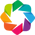

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [96]:
import holoviews as hv
hv.extension('bokeh')
# Plot the actual returns versus the strategy returns
(1 + Results[['daily_return', 'Strategy Returns']]).cumprod().hvplot()

##Try Support Vector Machine

In [97]:
from sklearn import svm
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.52      0.83      0.64       107
           1       0.61      0.25      0.36       110

    accuracy                           0.54       217
   macro avg       0.56      0.54      0.50       217
weighted avg       0.57      0.54      0.50       217



In [99]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the daily_return to the DataFrame
predictions_df['daily_return'] = model_df['daily_return']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = (
    predictions_df['daily_return'] * predictions_df['Predicted']
)

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

Predicted  daily_return  Strategy Returns
date                                                          
2021-05-30 10:00:00          1      0.015279          0.015279
2021-05-30 11:00:00          1      0.029479          0.029479
2021-05-30 12:00:00          1     -0.041299         -0.041299
2021-05-30 13:00:00          1      0.001387          0.001387
2021-05-30 14:00:00          0     -0.036436         -0.000000

Predicted  daily_return  Strategy Returns
date                                                          
2021-06-08 06:00:00          1     -0.010605         -0.010605
2021-06-08 07:00:00          1      0.023567          0.023567
2021-06-08 08:00:00          1      0.005115          0.005115
2021-06-08 09:00:00          1     -0.020224         -0.020224
2021-06-08 10:00:00          1      0.001315          0.001315

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
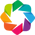

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [100]:
import holoviews as hv
hv.extension('bokeh')
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['daily_return', 'Strategy Returns']]).cumprod().hvplot()